<h1 style="background-color: #3cb371; padding: 20px;"> <center> <span style="color:white">
<br> INSTALLATION
</span> </center> </h1>

In [ ]:
pip install pmdarima


Processing regular_milled_rice...


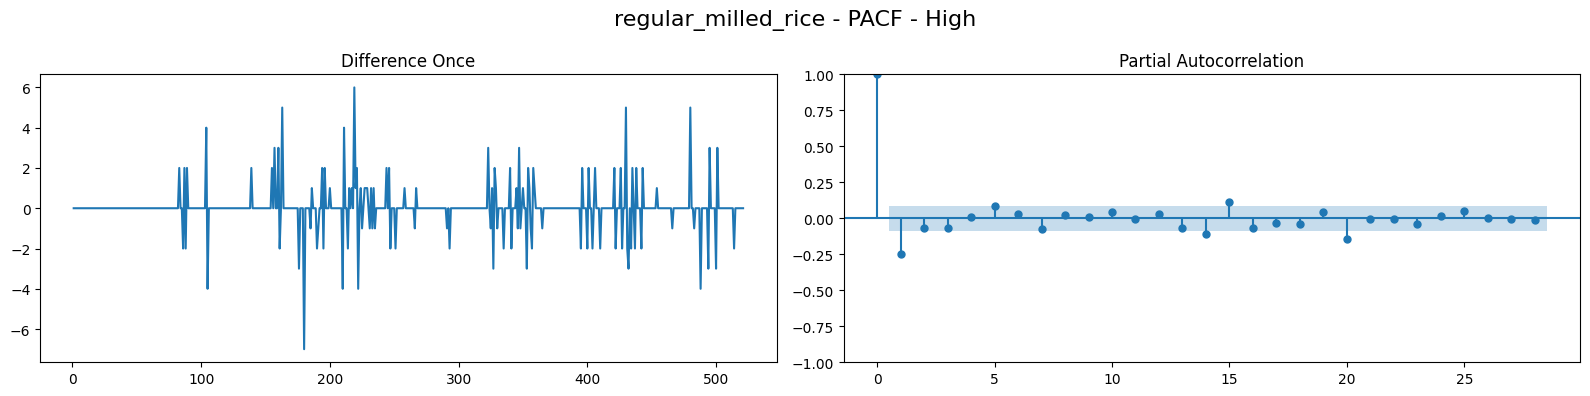

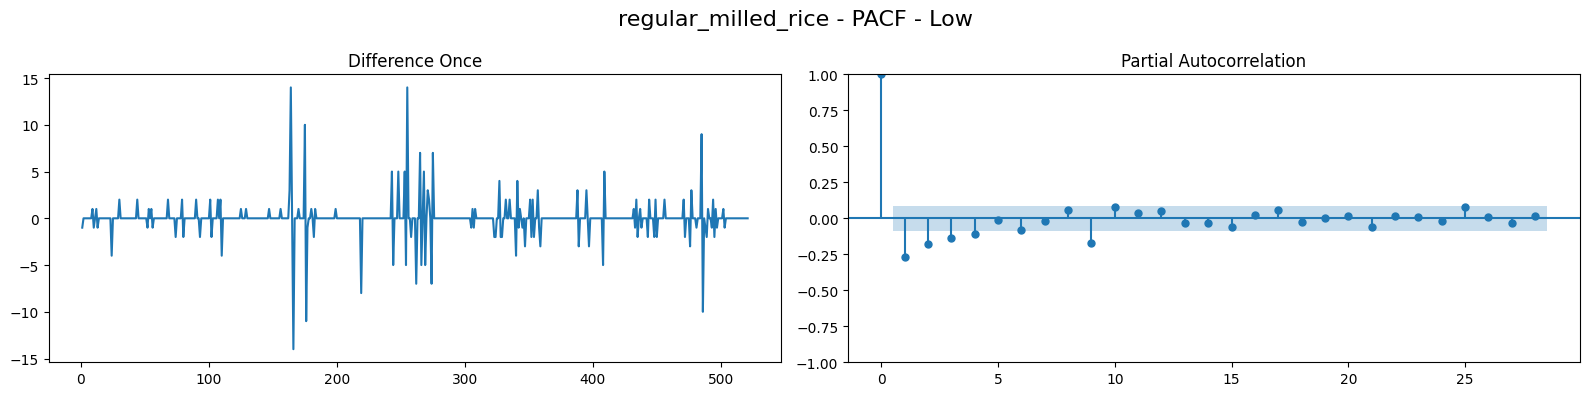

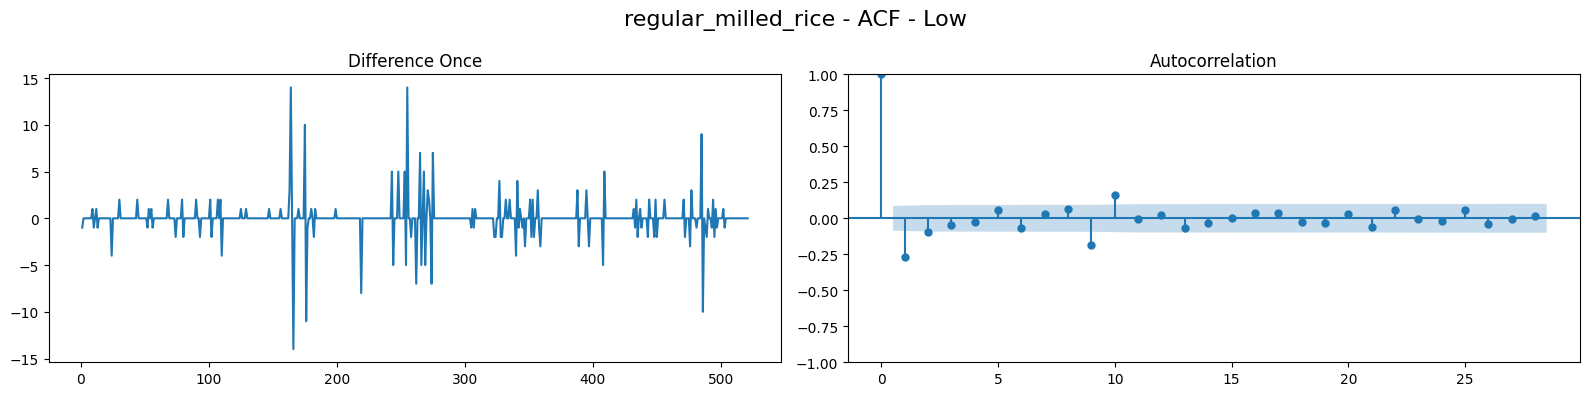

D-value for regular_milled_rice - High: 1
D-value for regular_milled_rice - Low: 1

Processing well_milled_rice...


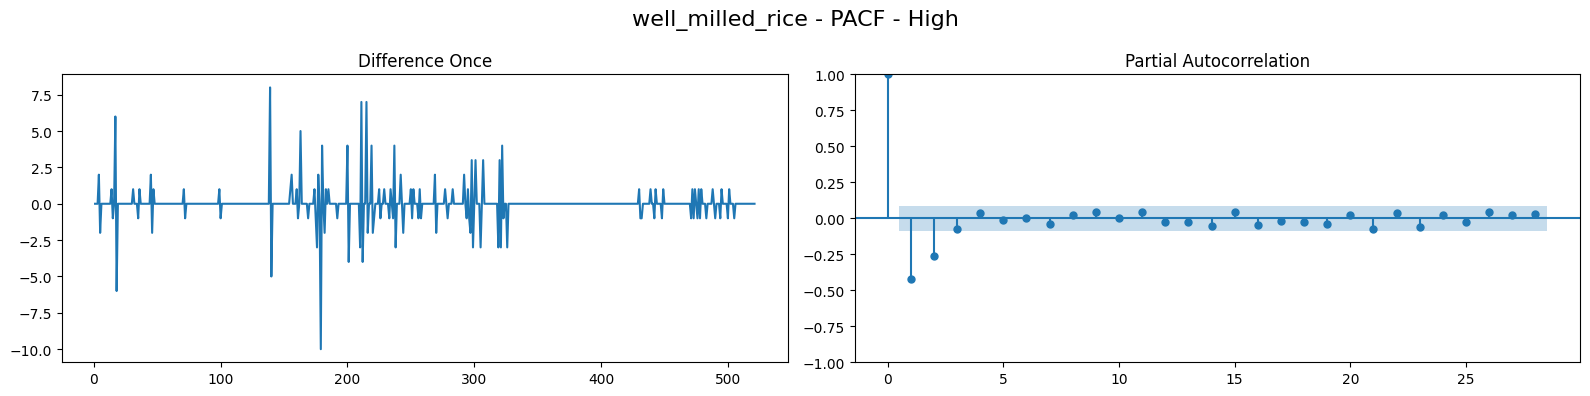

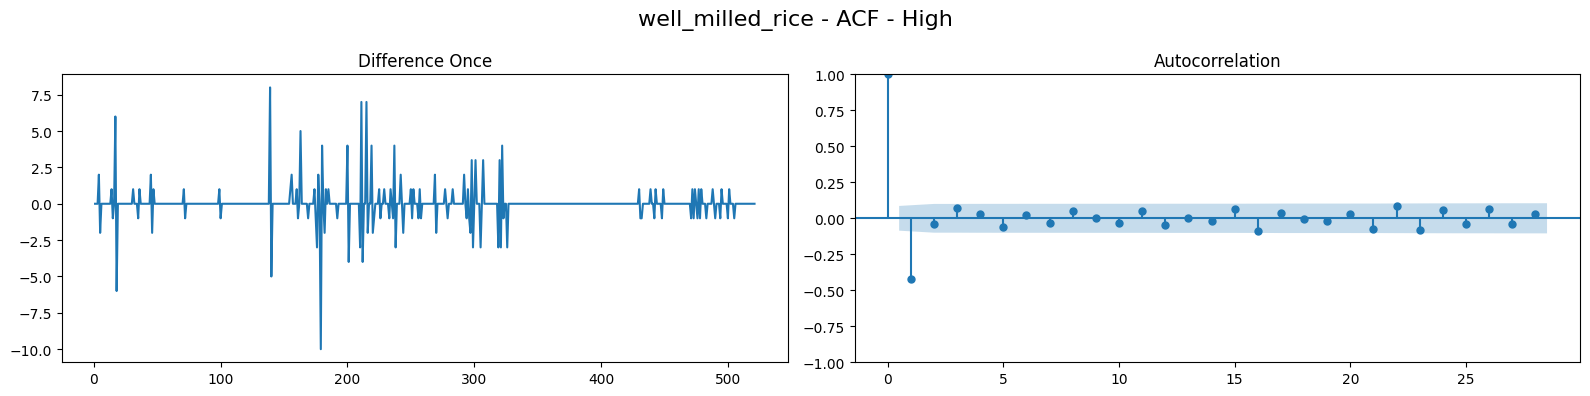

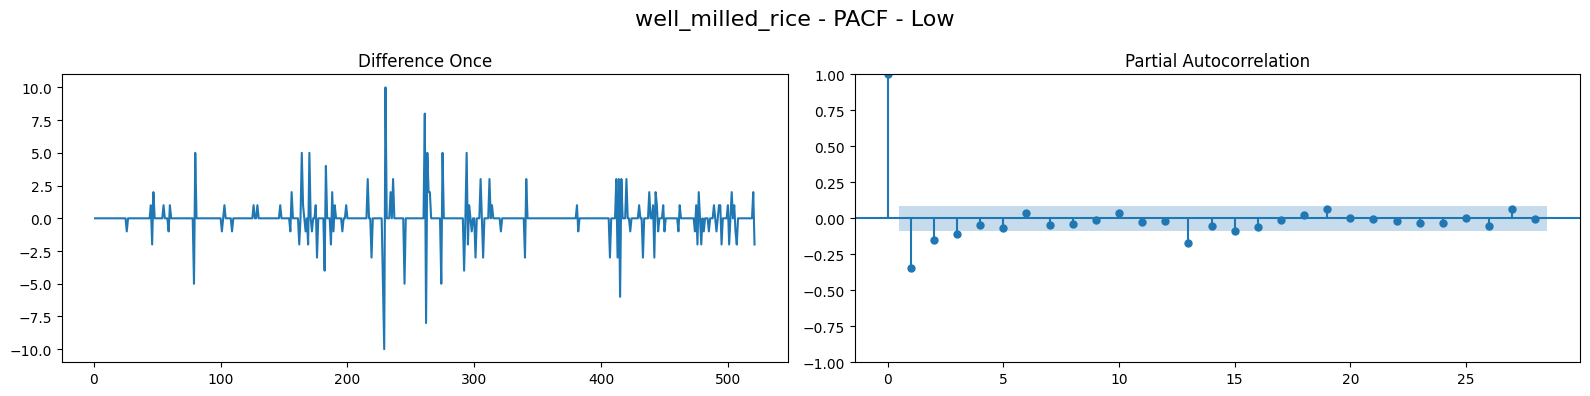

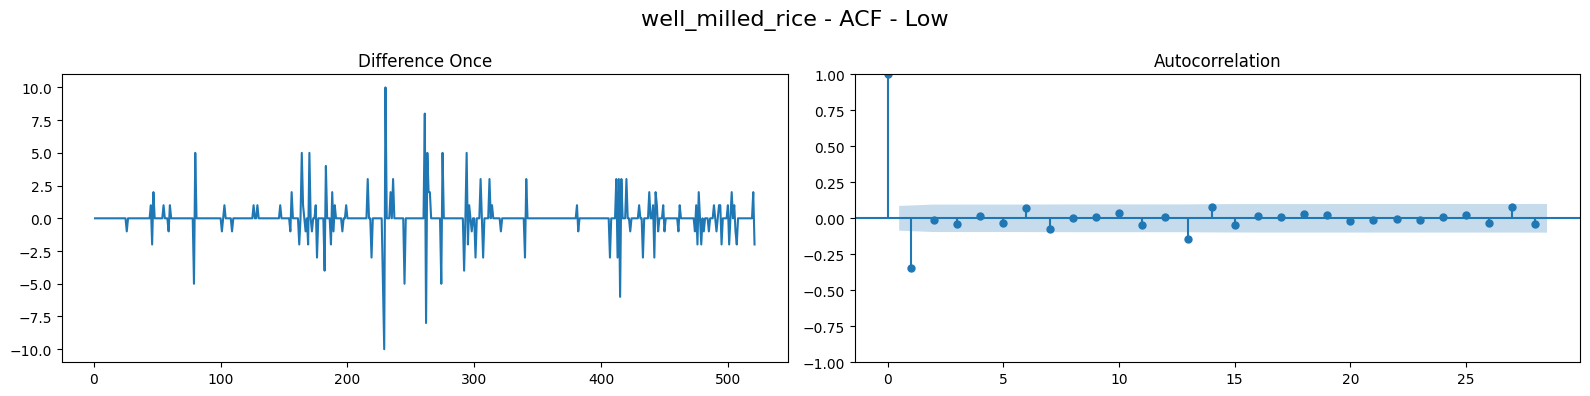

D-value for well_milled_rice - High: 1
D-value for well_milled_rice - Low: 1

Processing premium_rice...


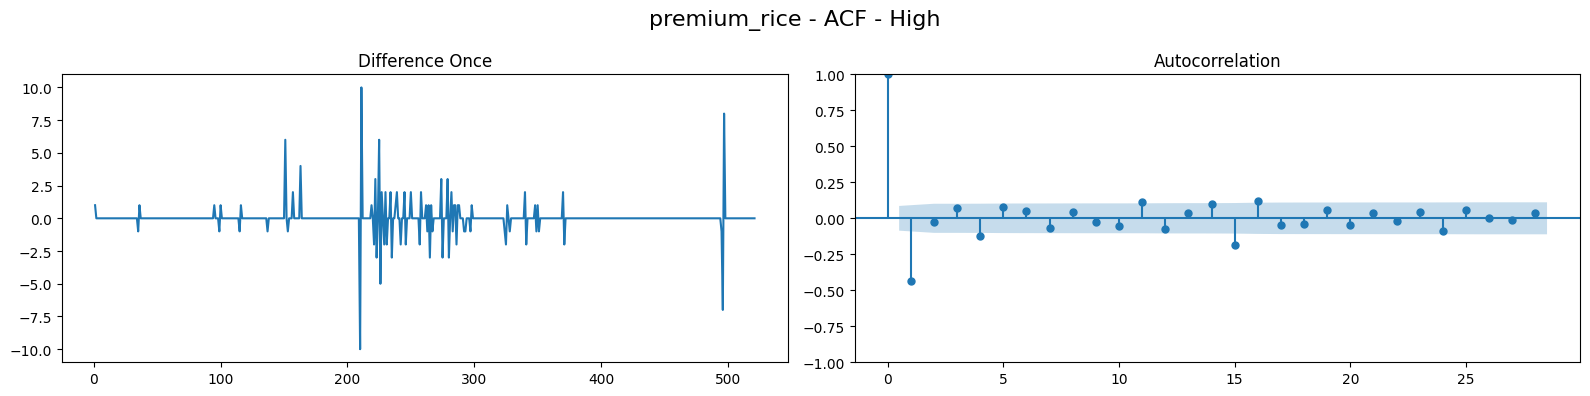

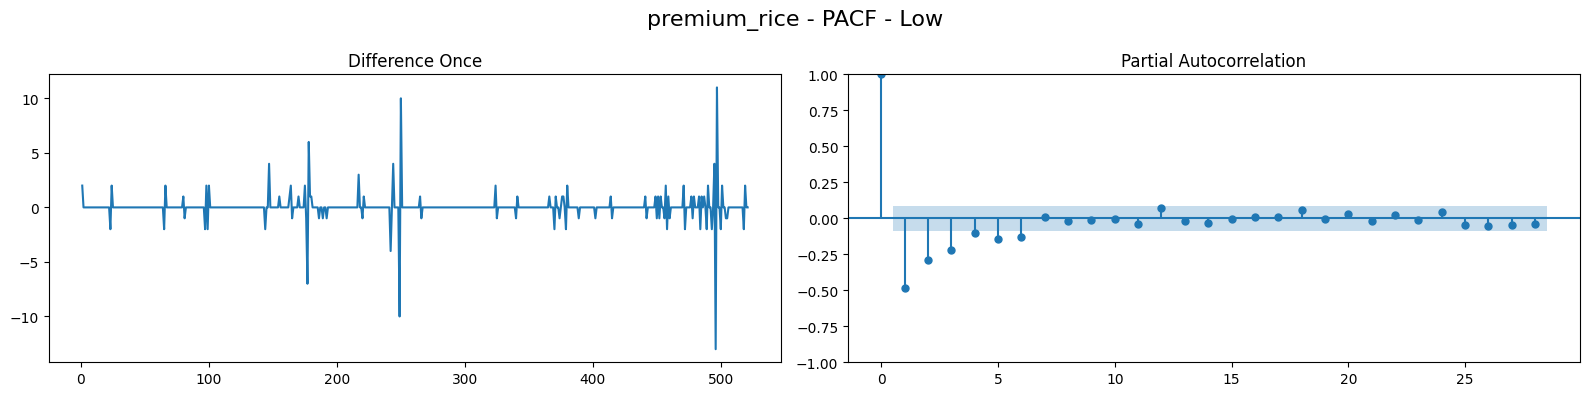

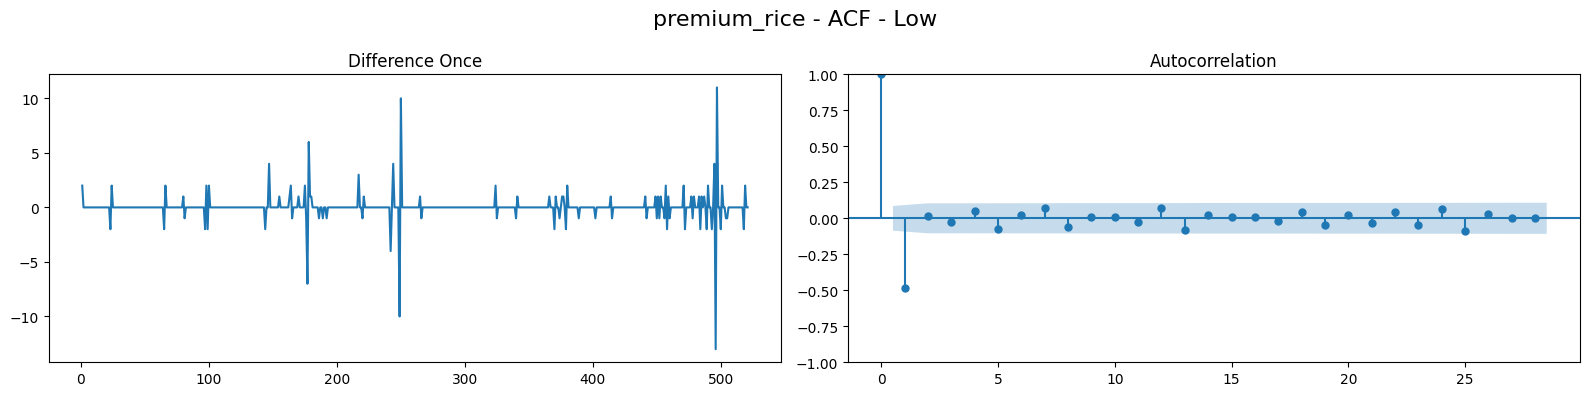

D-value for premium_rice - High: 1
D-value for premium_rice - Low: 1

Processing special_rice...


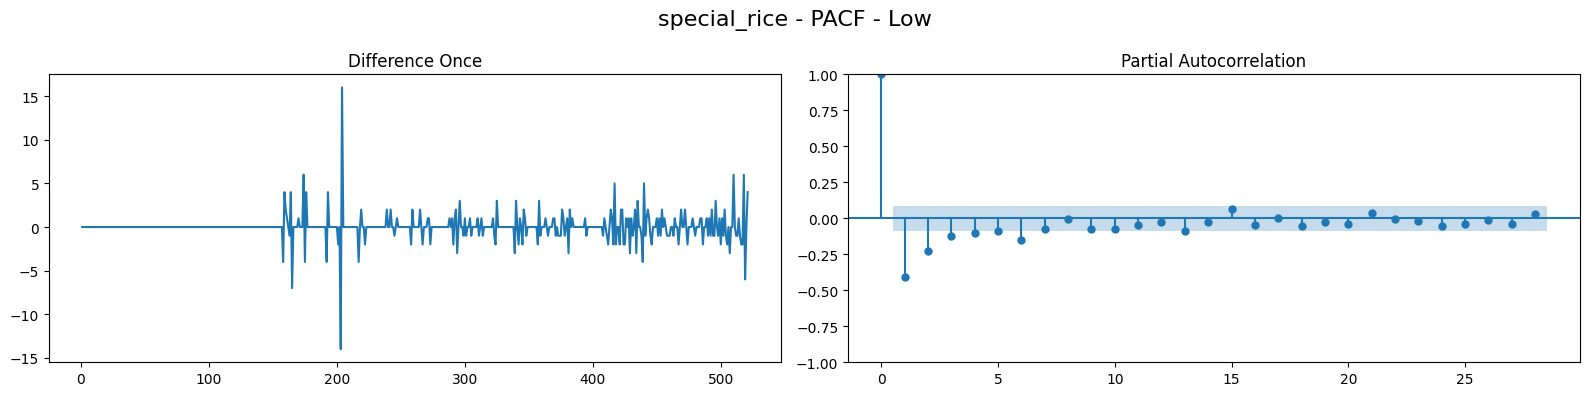

D-value for special_rice - High: 1
D-value for special_rice - Low: 0

Processing beef_brisket...


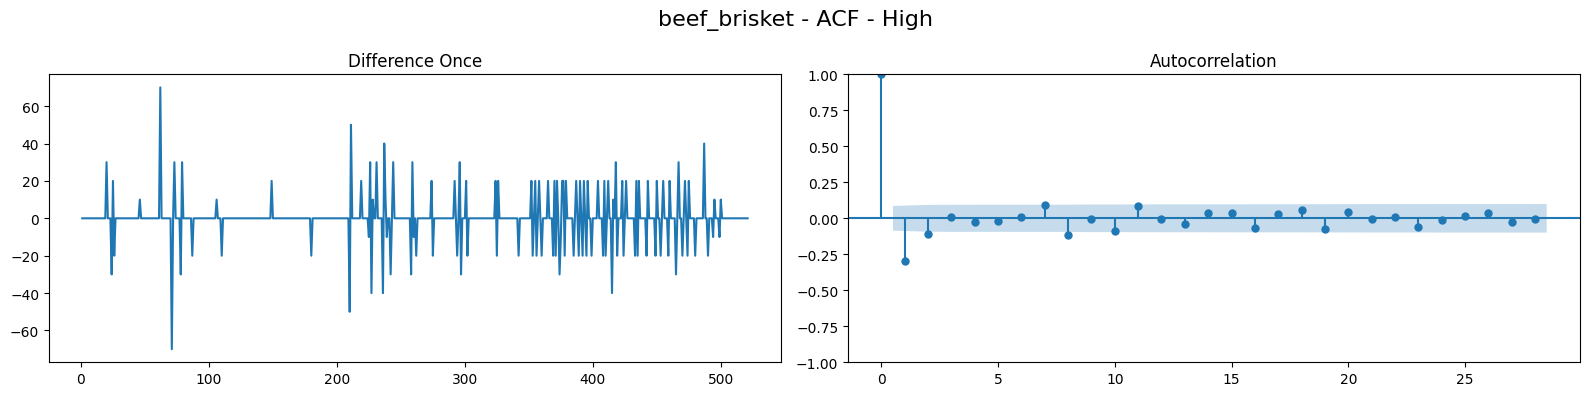

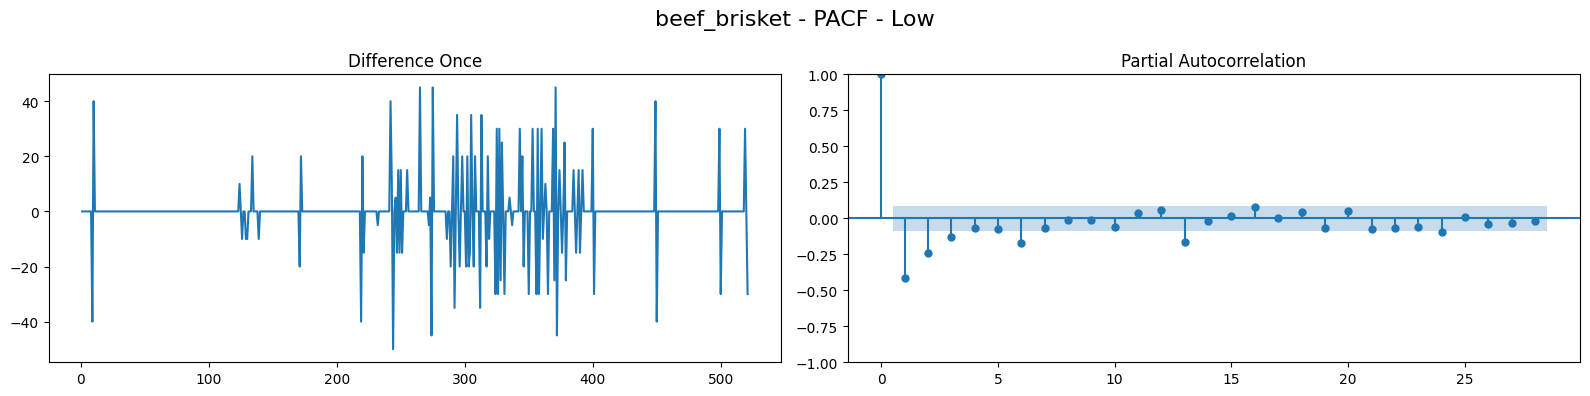

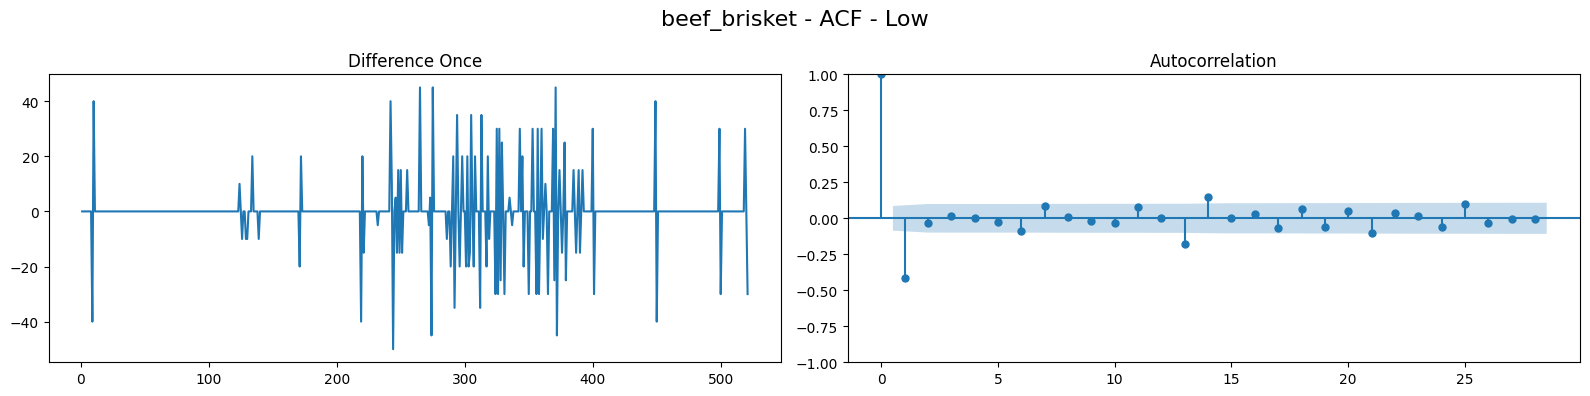

D-value for beef_brisket - High: 0
D-value for beef_brisket - Low: 1

Processing beef_rump...


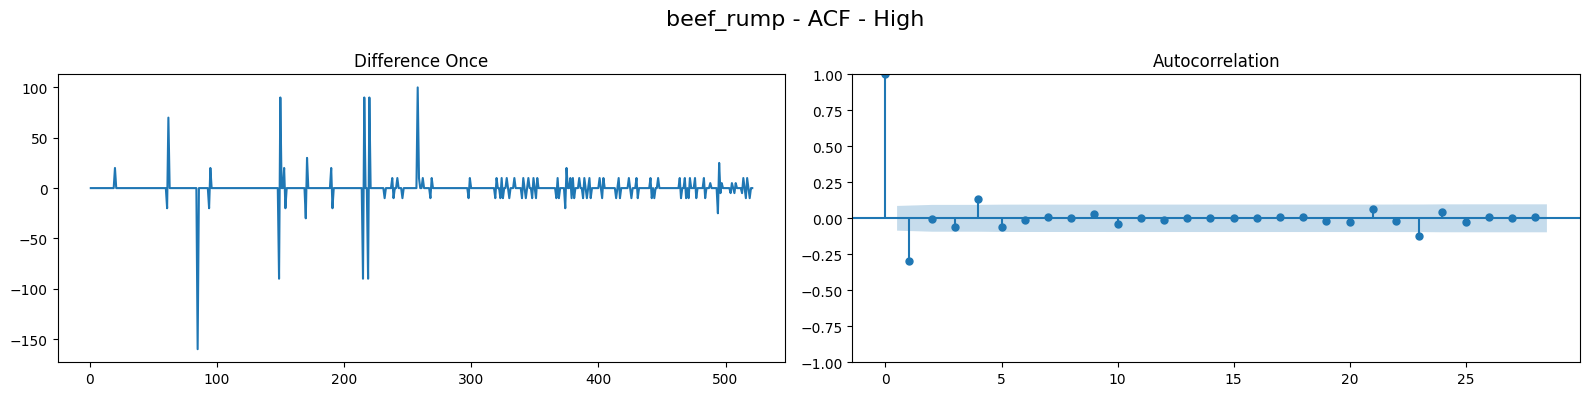

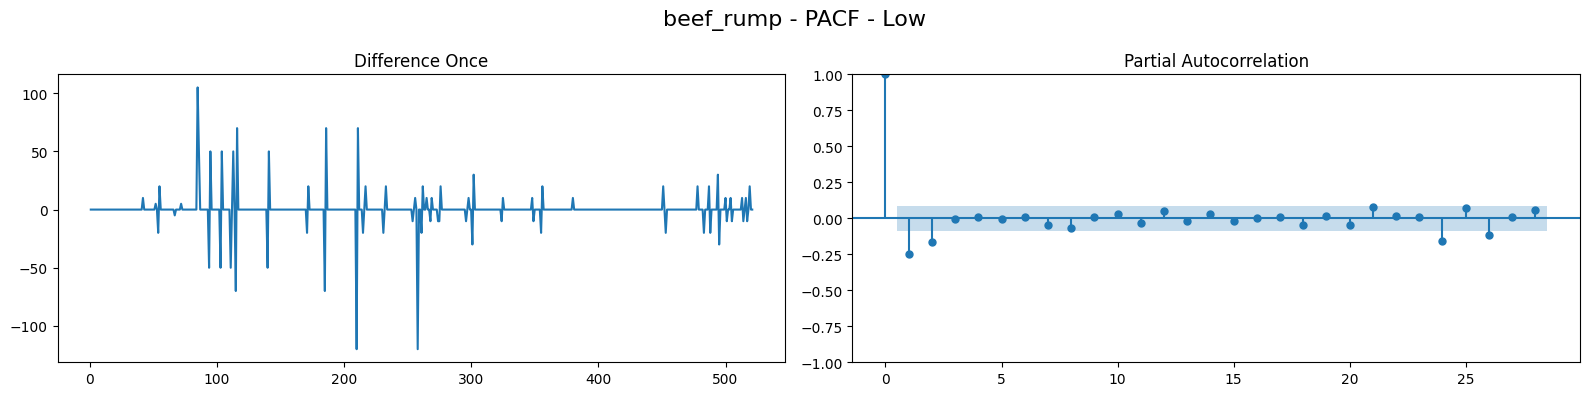

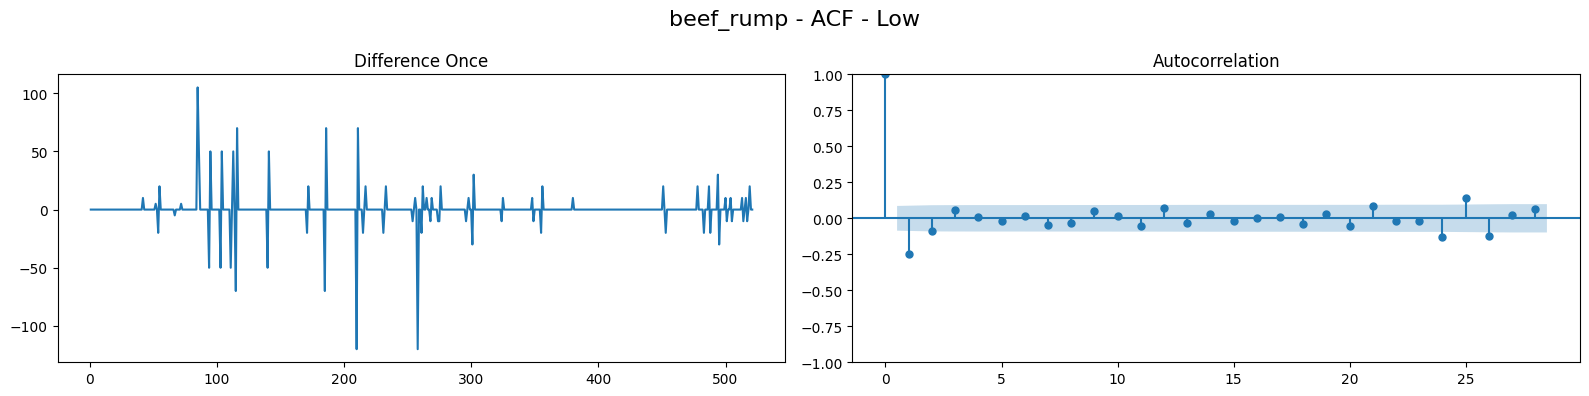

D-value for beef_rump - High: 1
D-value for beef_rump - Low: 1

Processing whole_chicken...


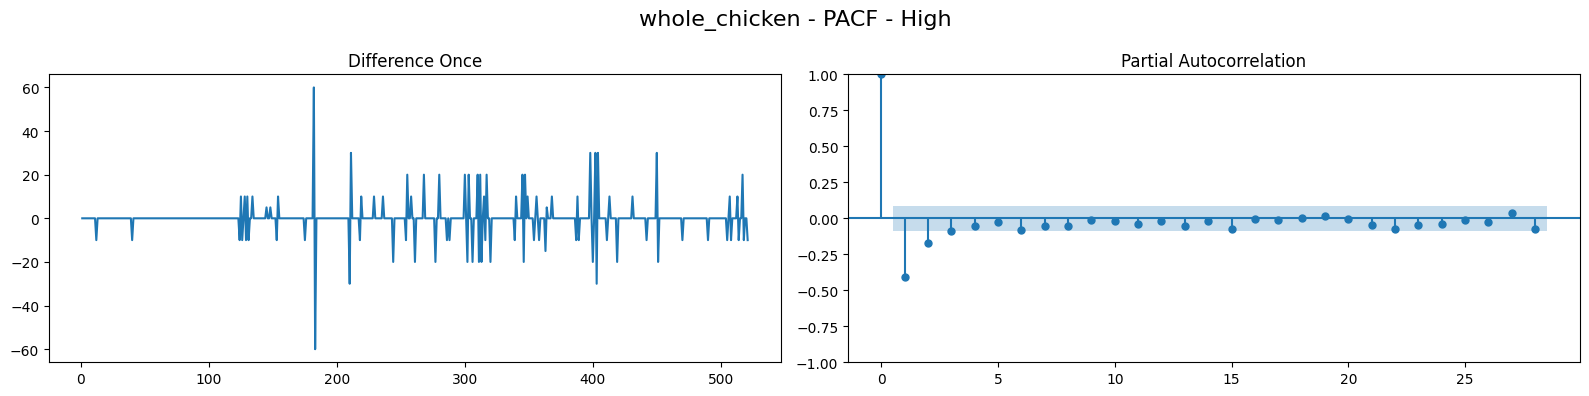

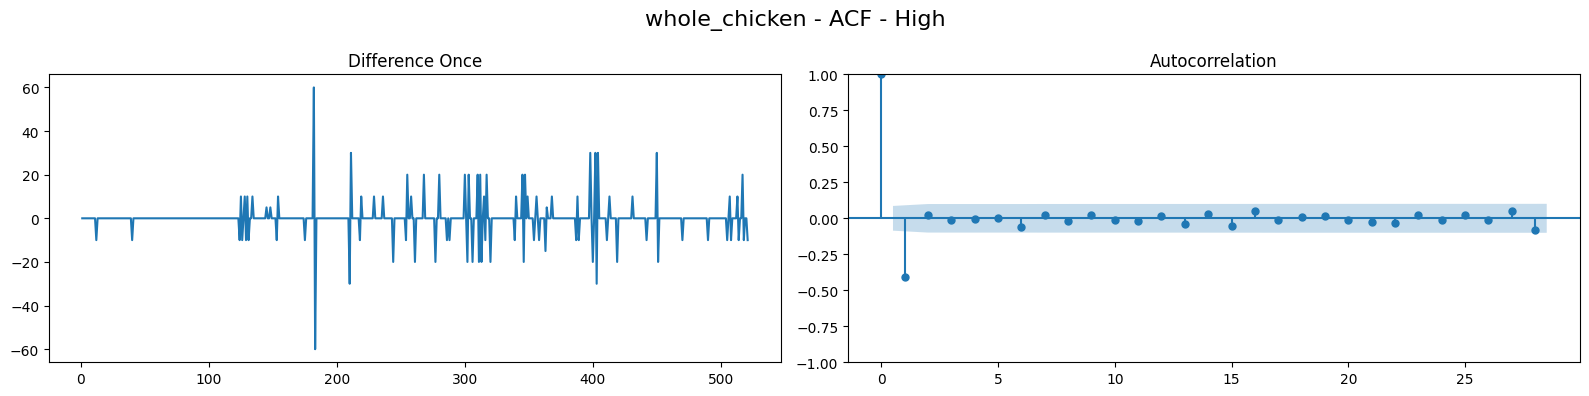

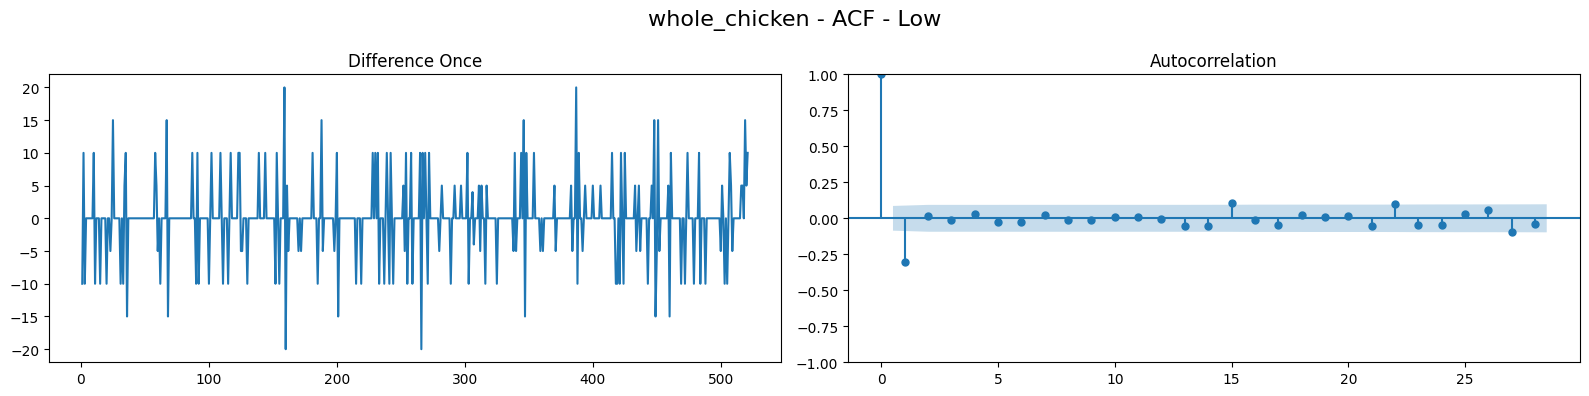

D-value for whole_chicken - High: 0
D-value for whole_chicken - Low: 1

Processing pork_belly...


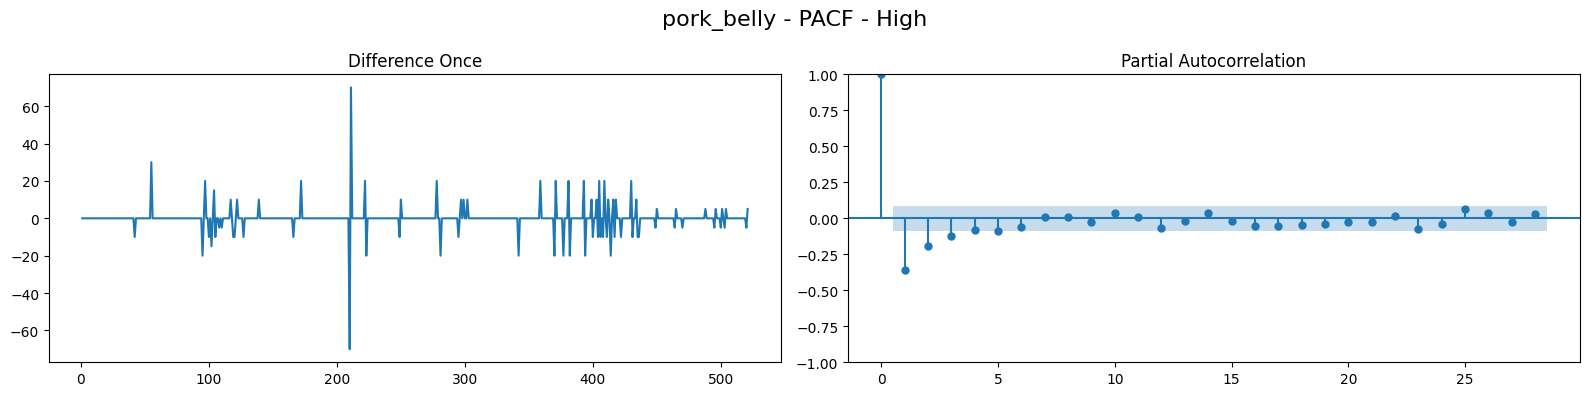

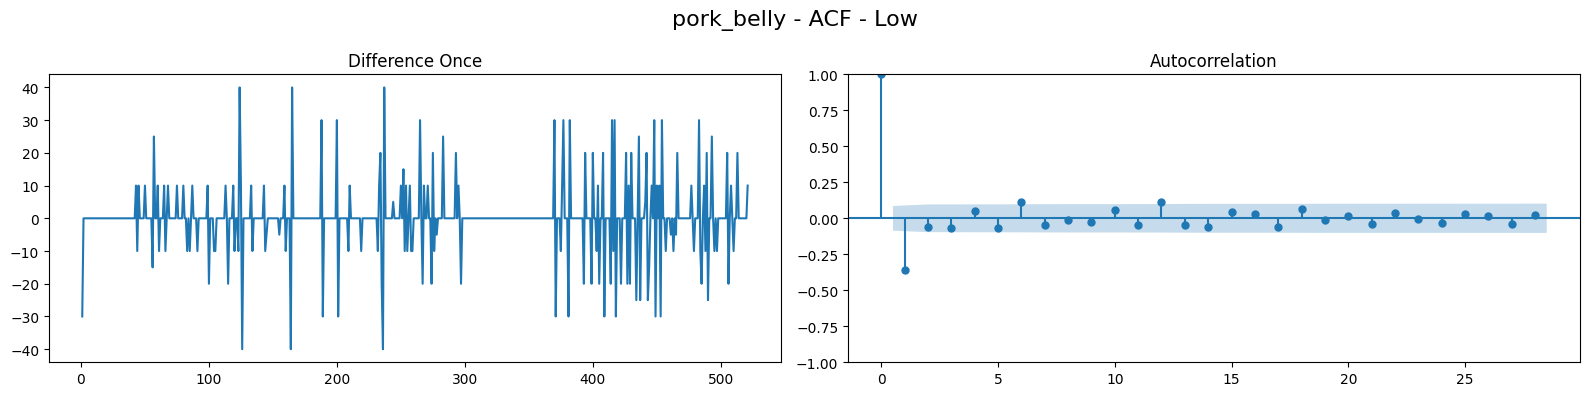

D-value for pork_belly - High: 1
D-value for pork_belly - Low: 1

Processing pork_kasim...


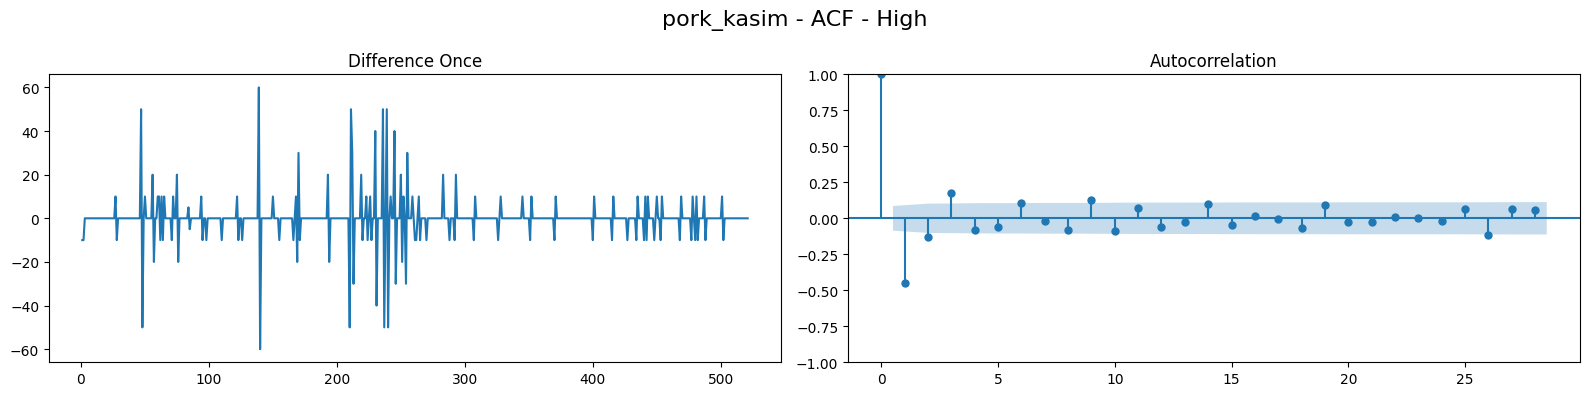

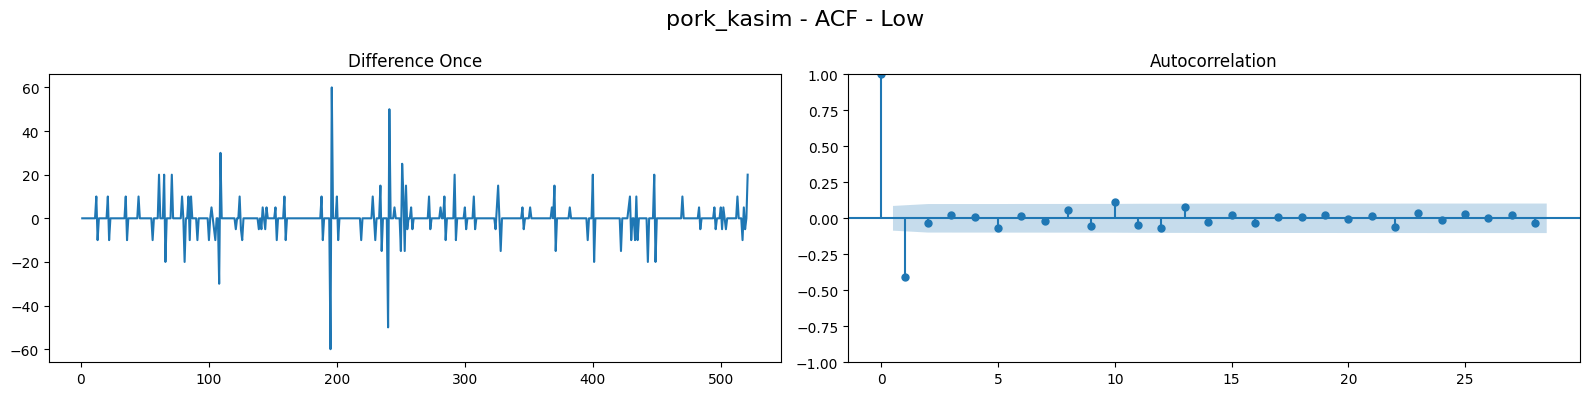

D-value for pork_kasim - High: 1
D-value for pork_kasim - Low: 1

Processing alumahan...


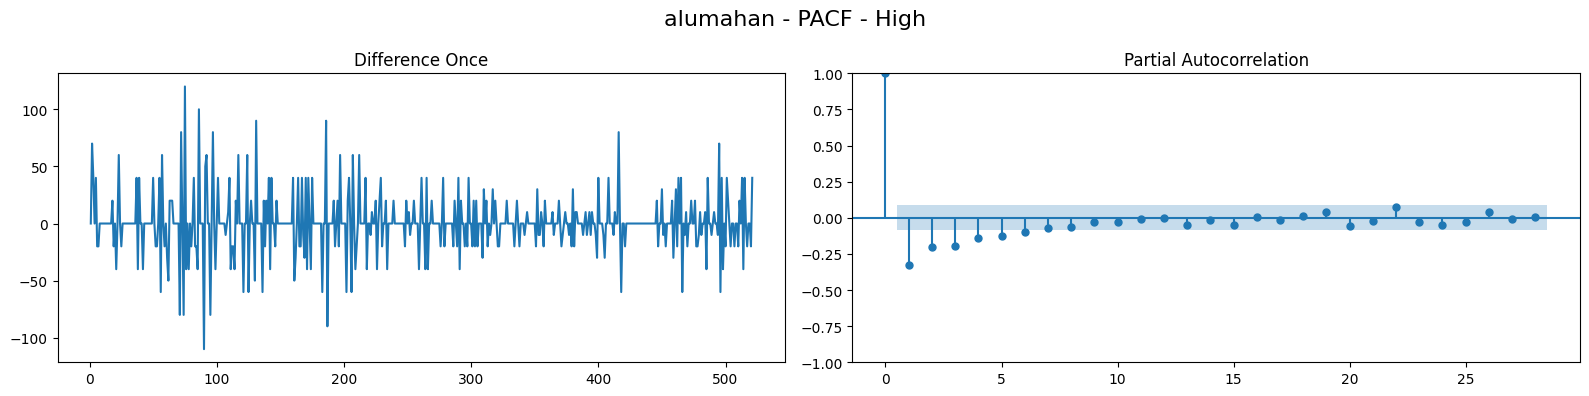

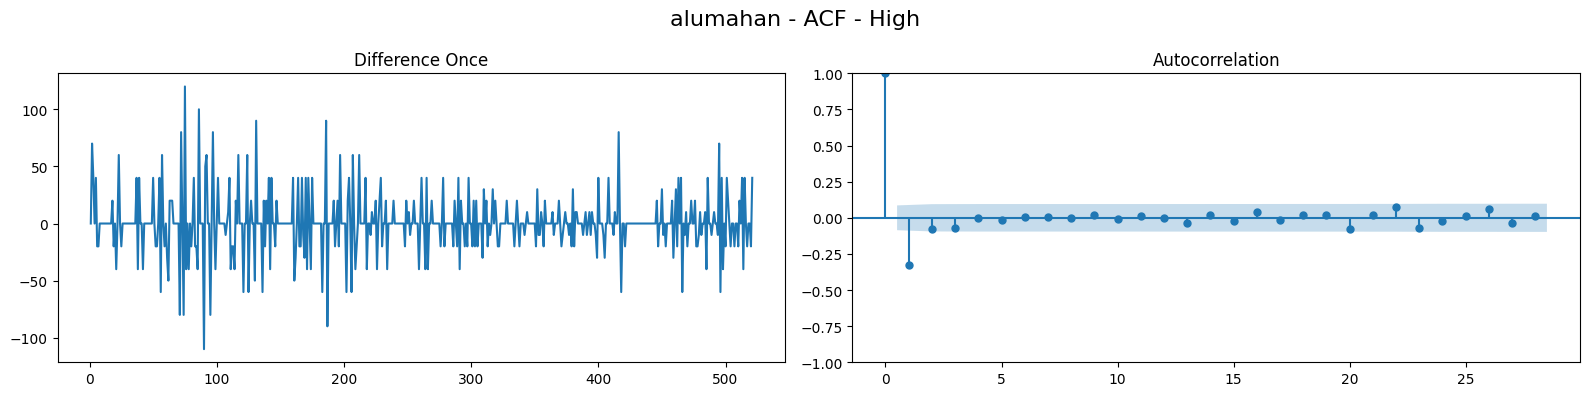

D-value for alumahan - High: 0
D-value for alumahan - Low: 0

Processing bangus...


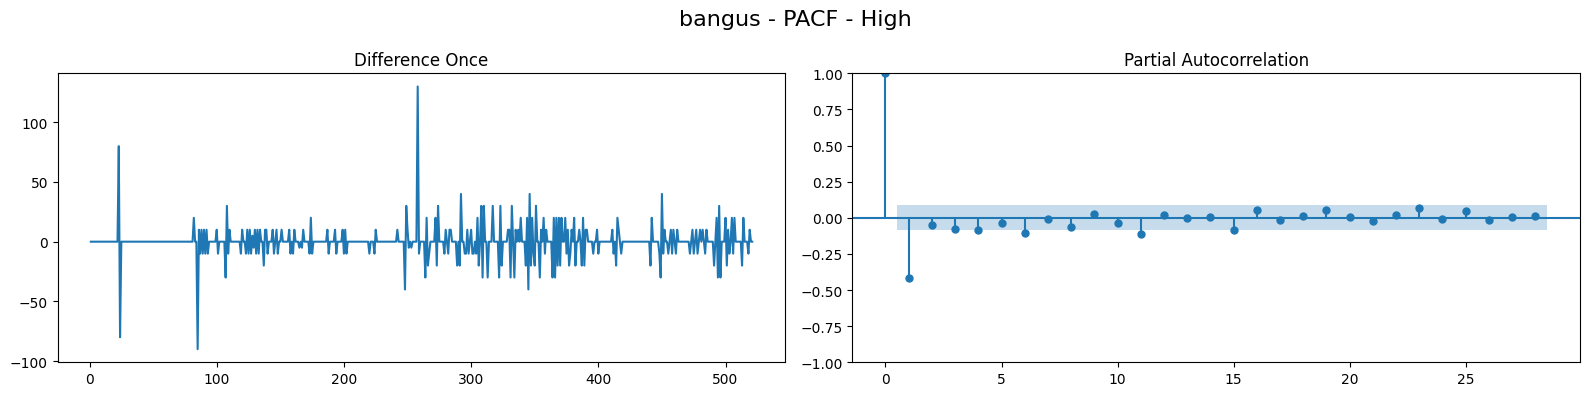

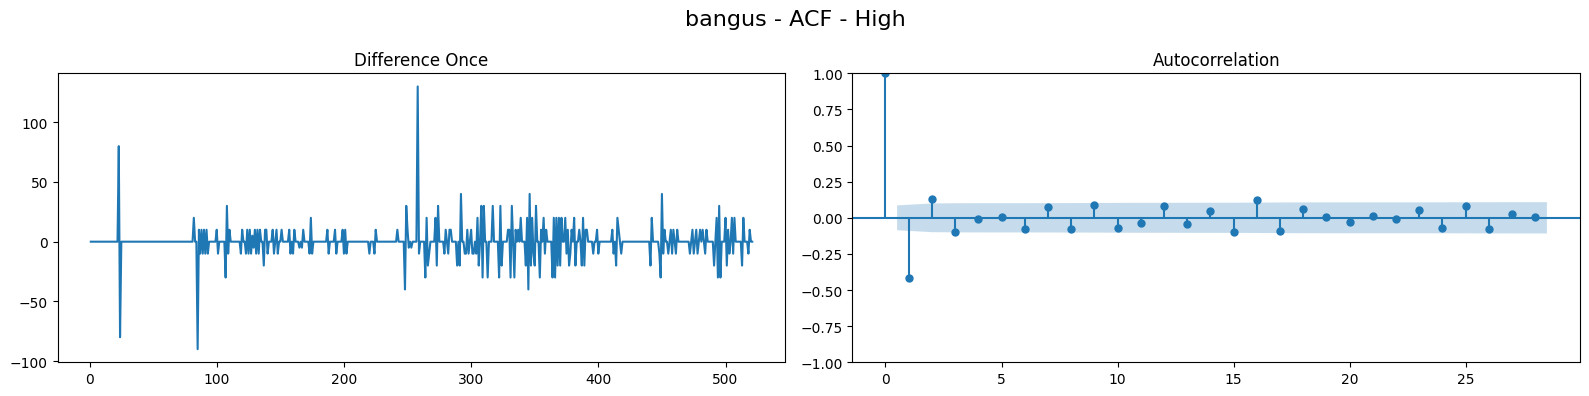

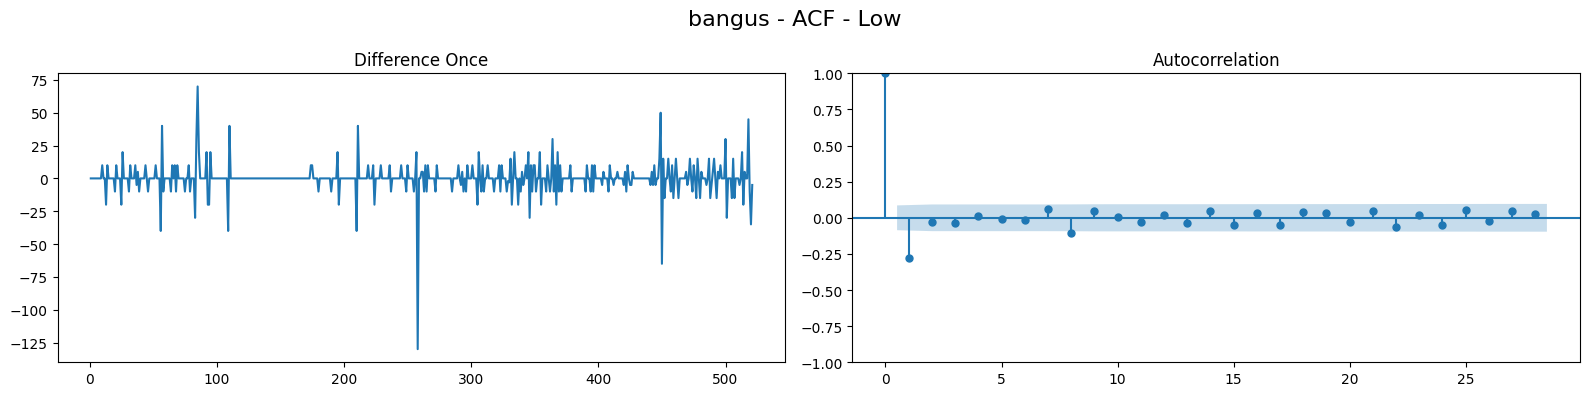

D-value for bangus - High: 1
D-value for bangus - Low: 1

Processing galunggong...


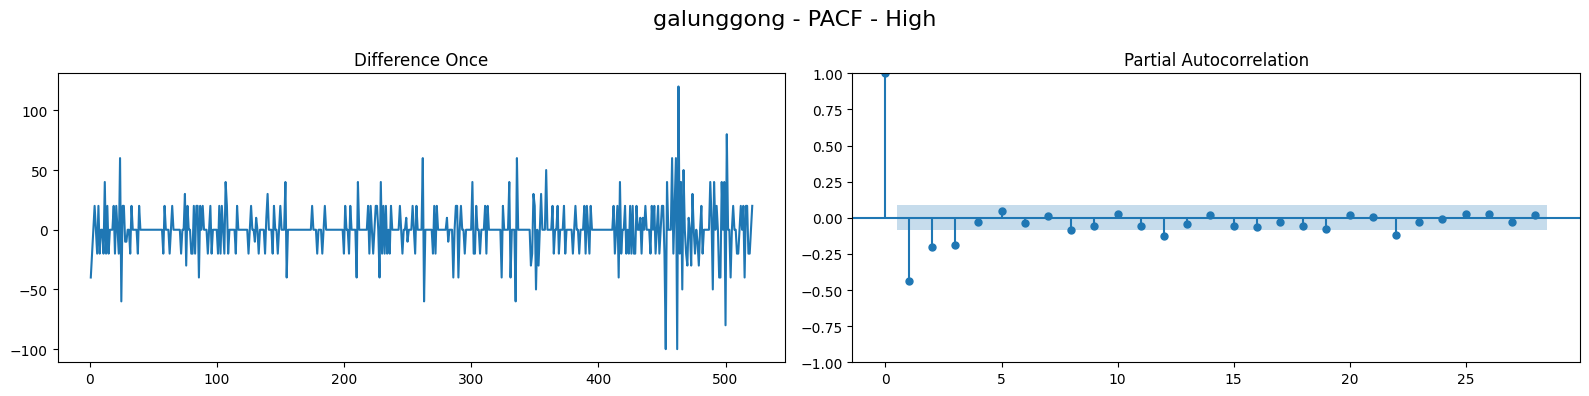

D-value for galunggong - High: 0
D-value for galunggong - Low: 1

Processing tilapia...


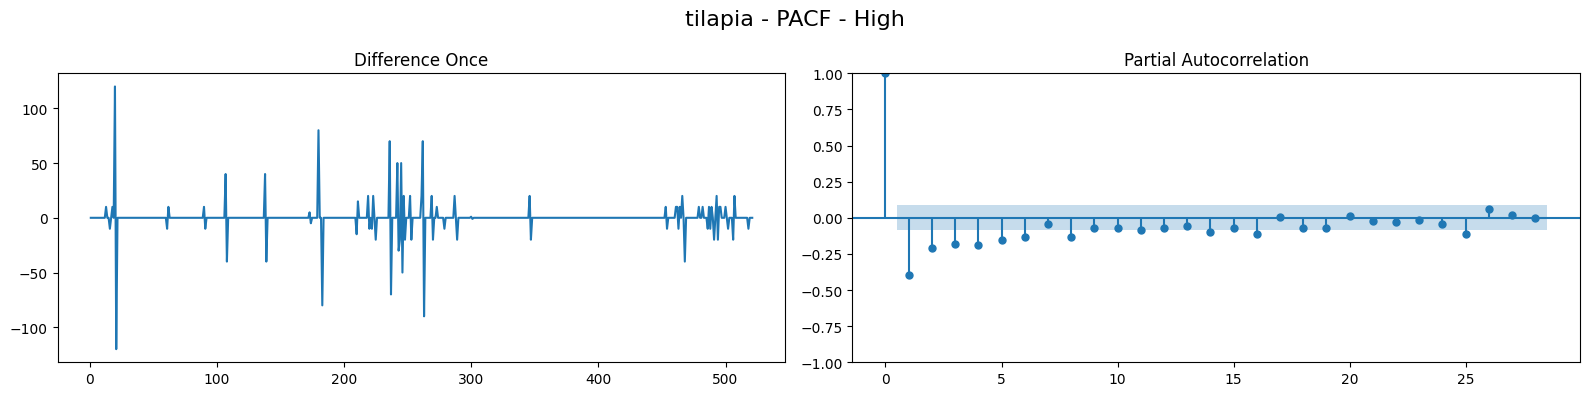

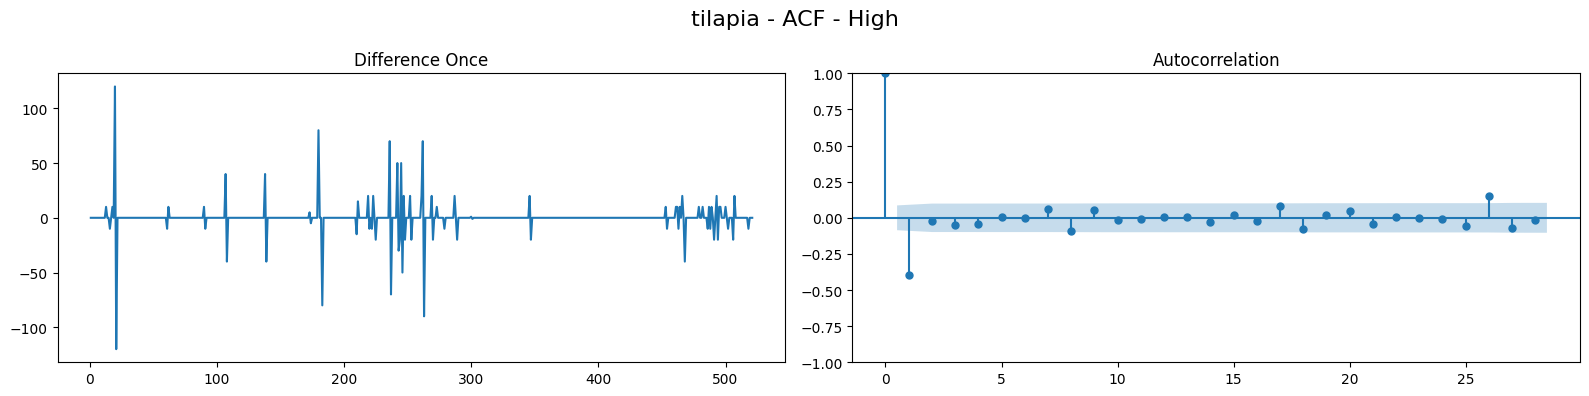

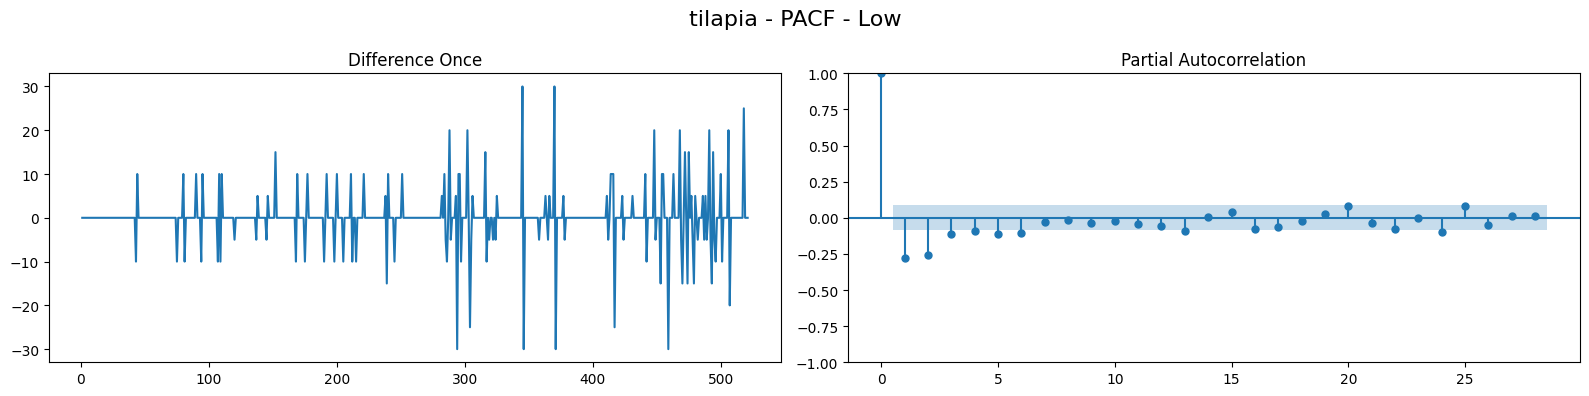

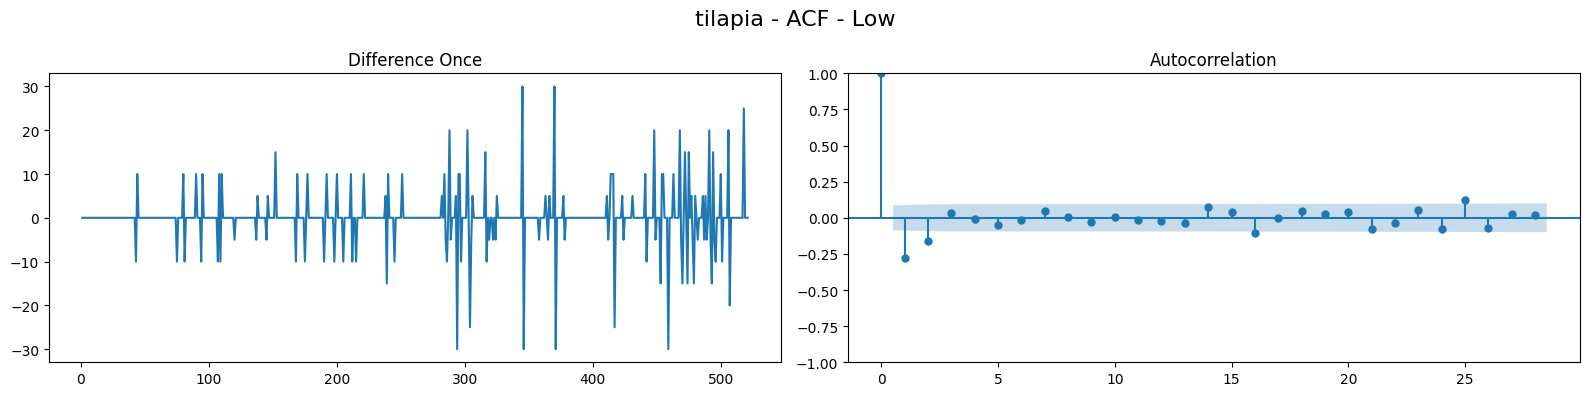

D-value for tilapia - High: 0
D-value for tilapia - Low: 1

Processing banana_lakatan...


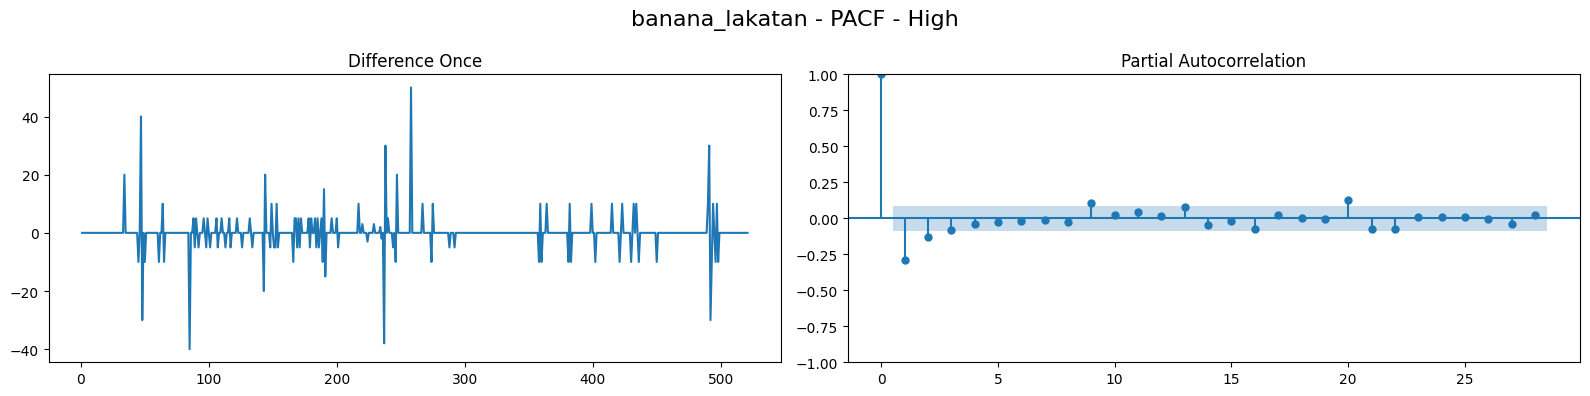

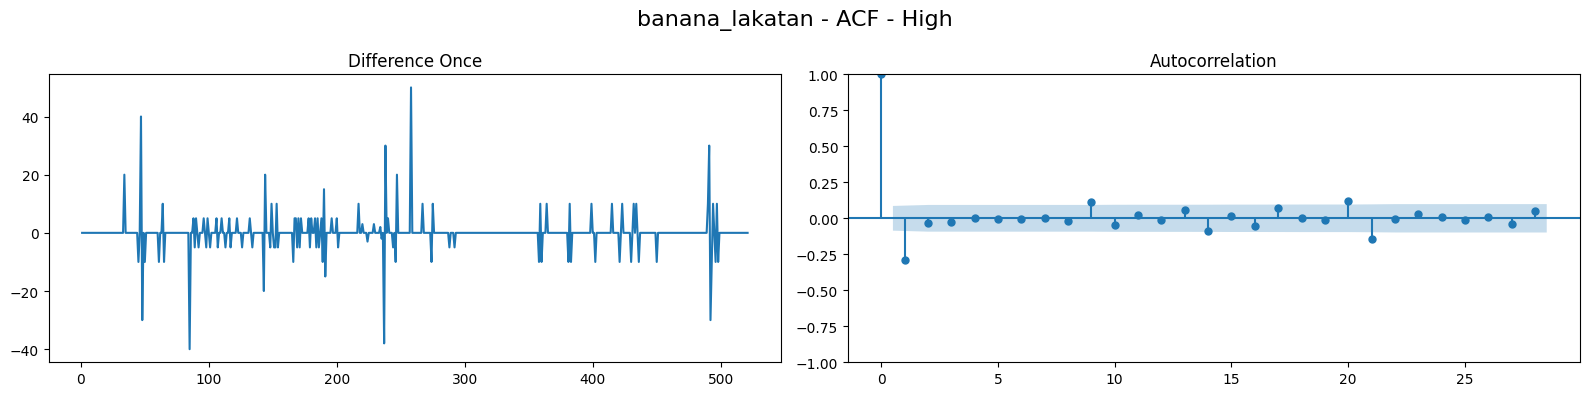

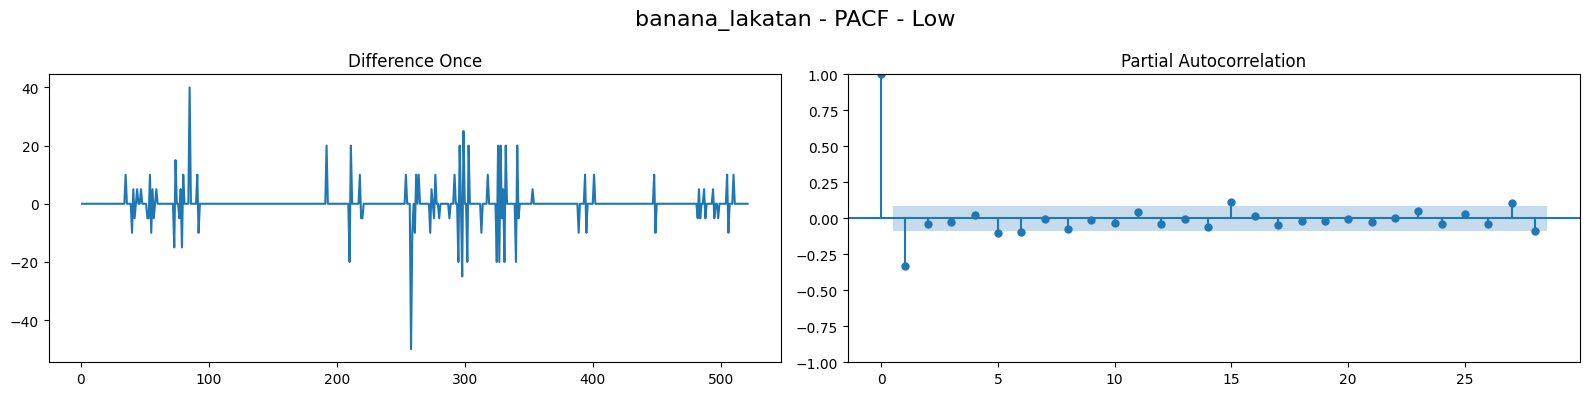

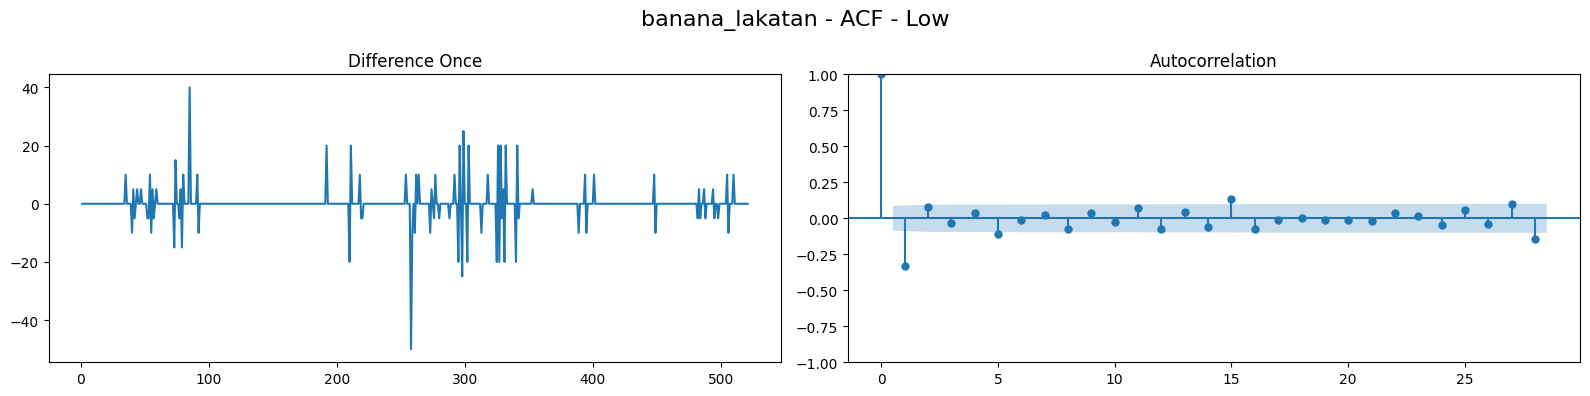

D-value for banana_lakatan - High: 1
D-value for banana_lakatan - Low: 1

Processing calamansi...


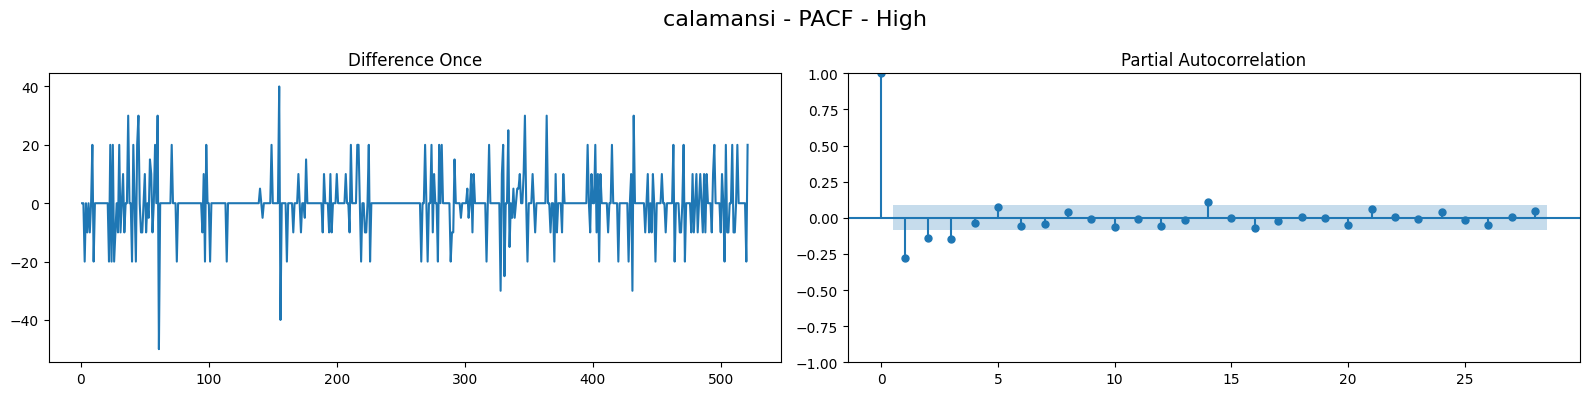

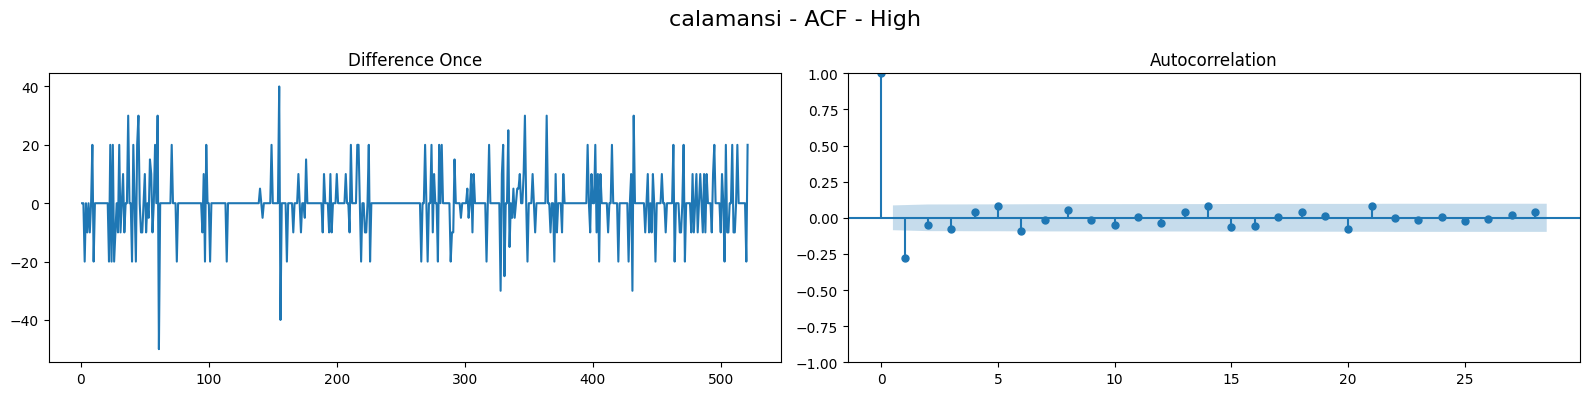

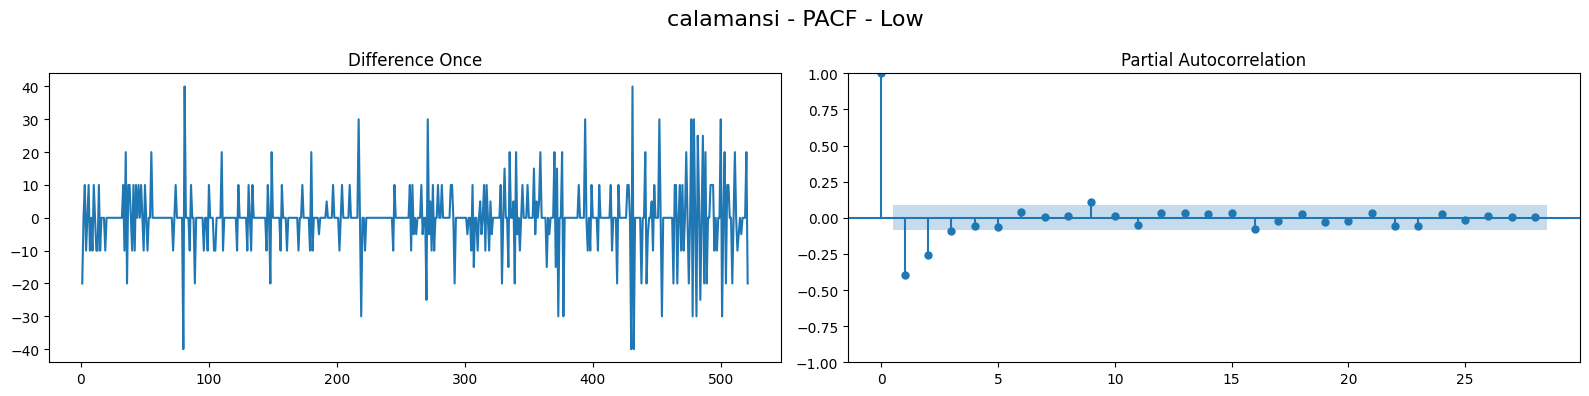

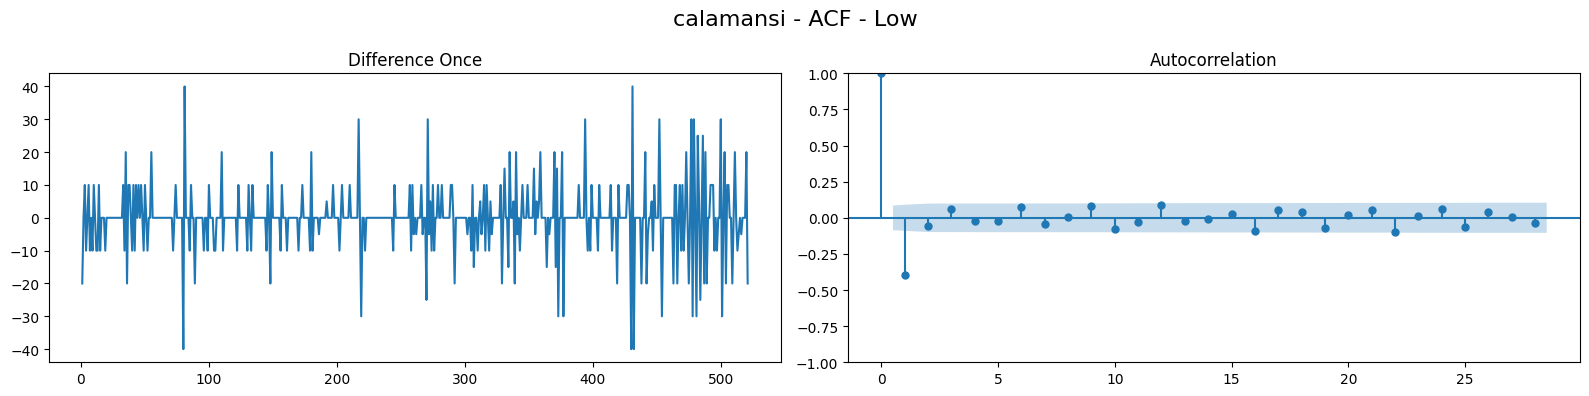

D-value for calamansi - High: 1
D-value for calamansi - Low: 1

Processing mango...


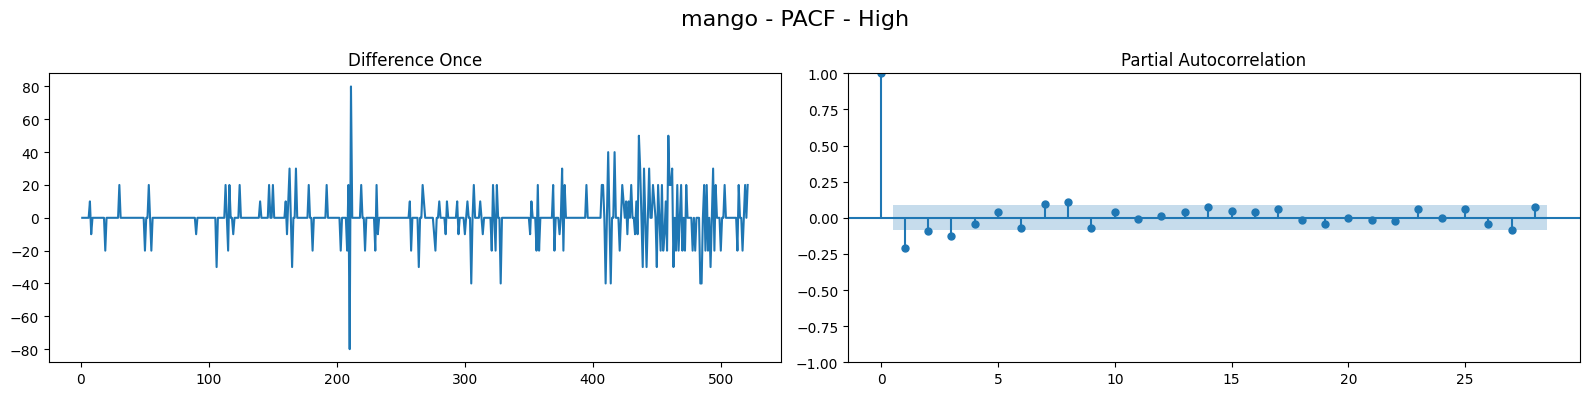

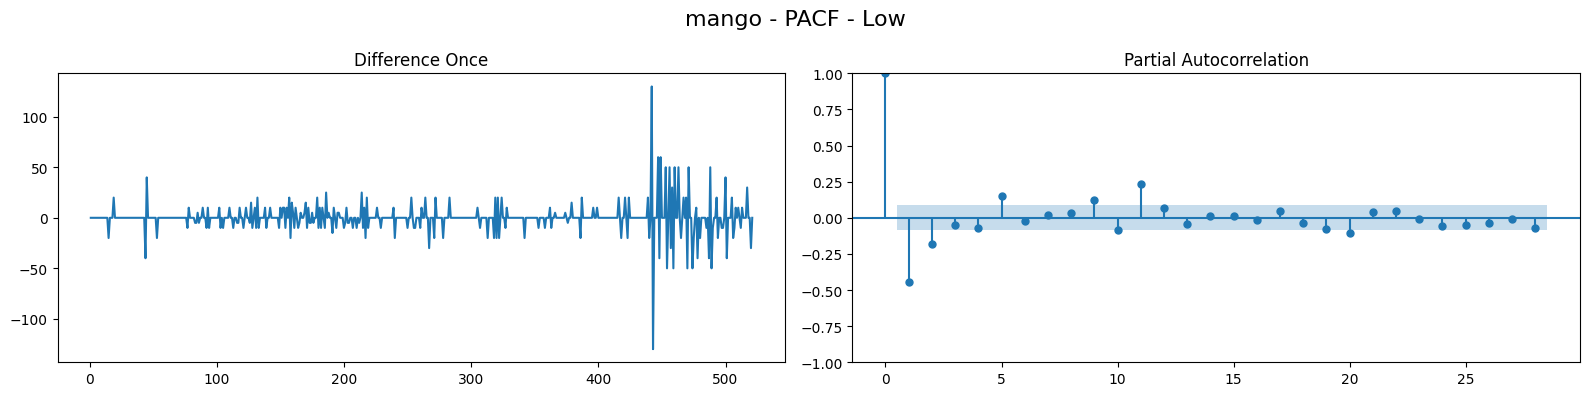

D-value for mango - High: 1
D-value for mango - Low: 1

Processing papaya...


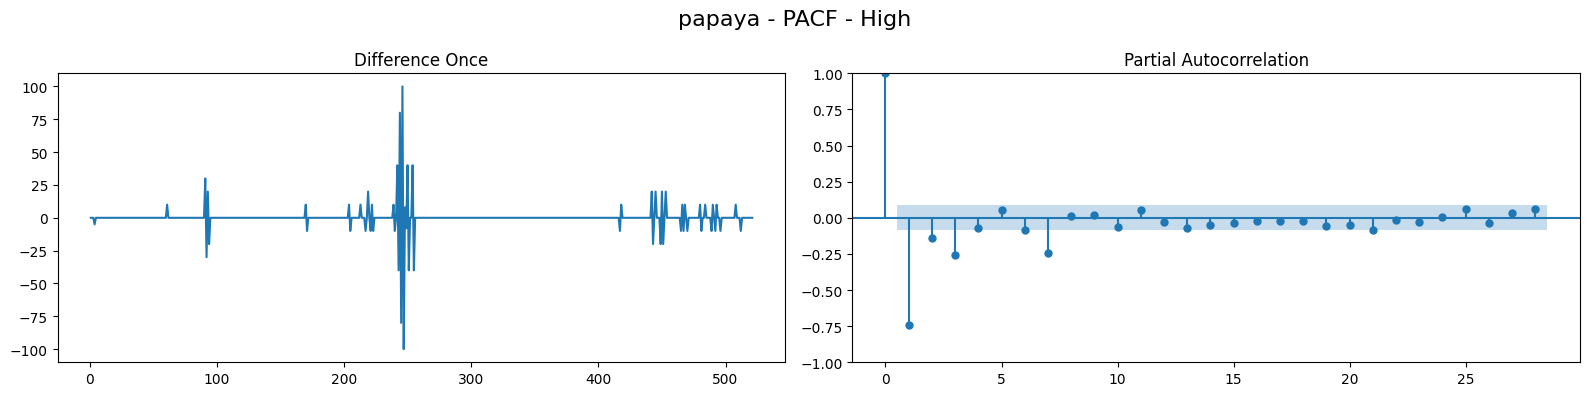

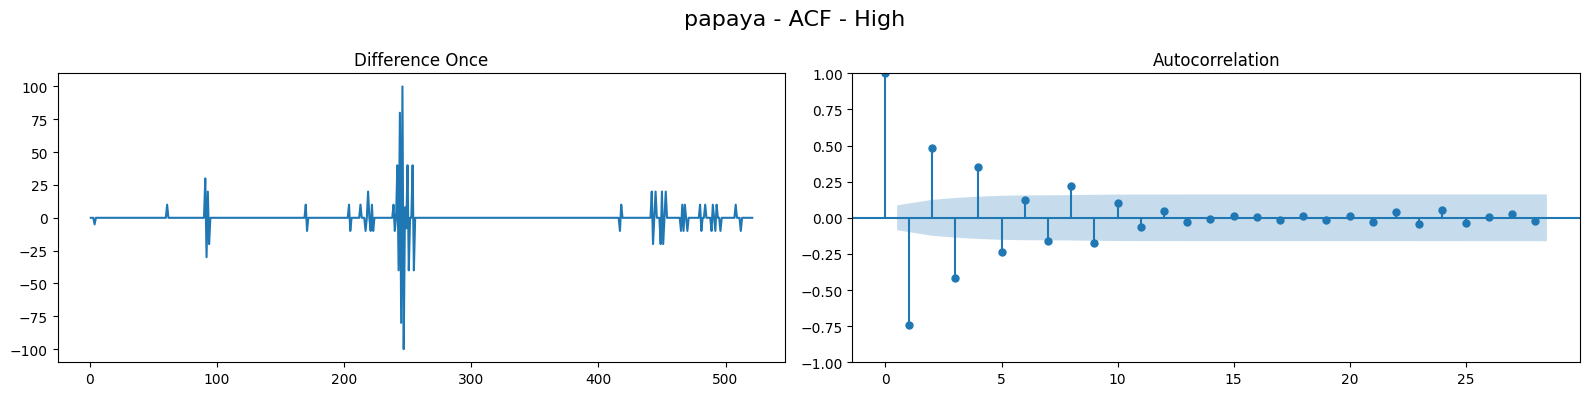

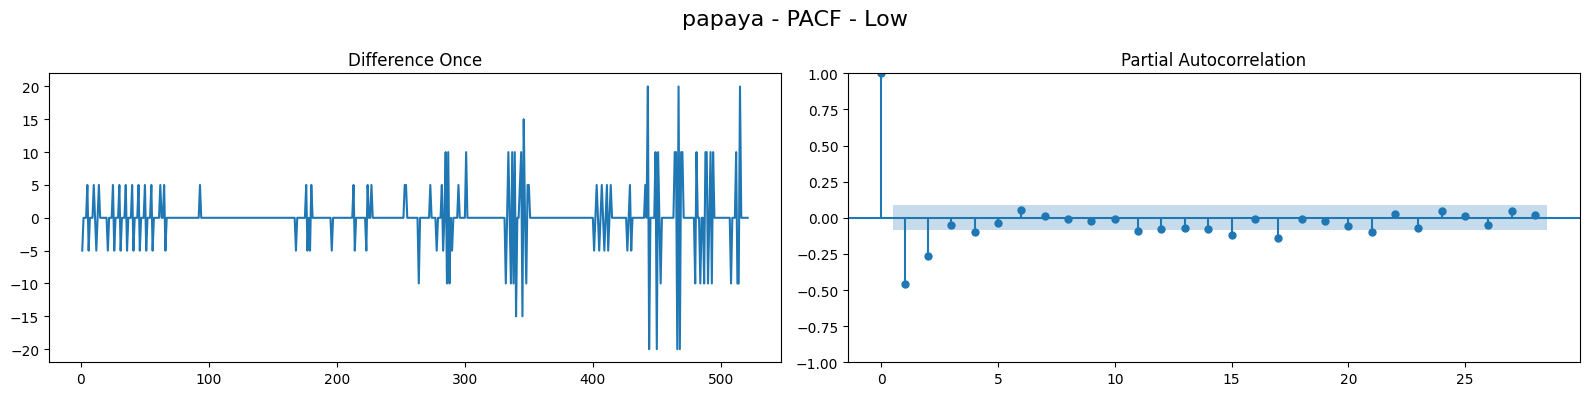

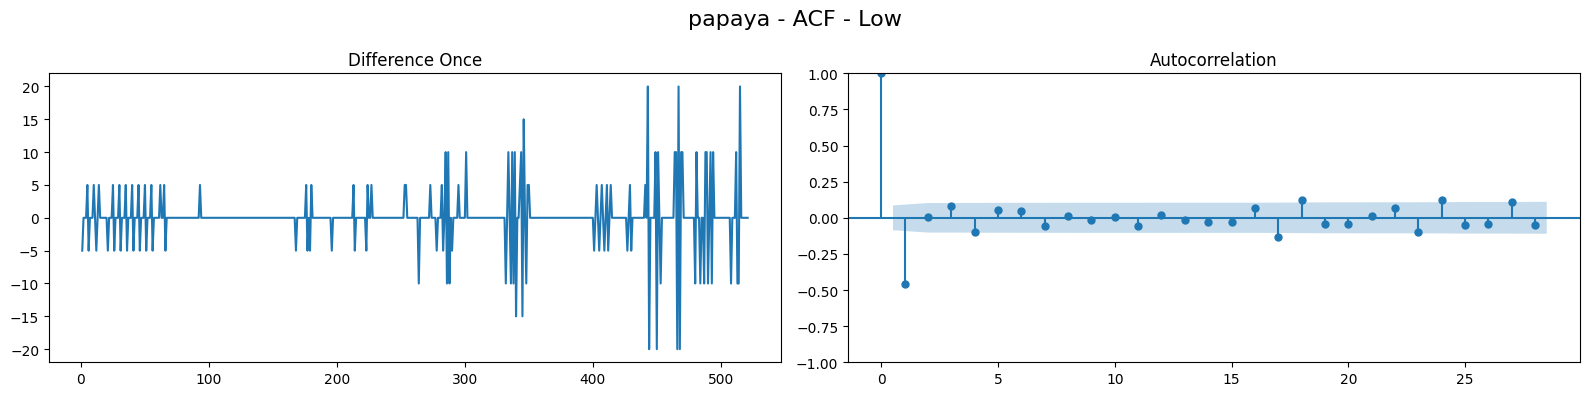

D-value for papaya - High: 0
D-value for papaya - Low: 0

Processing cabbage...


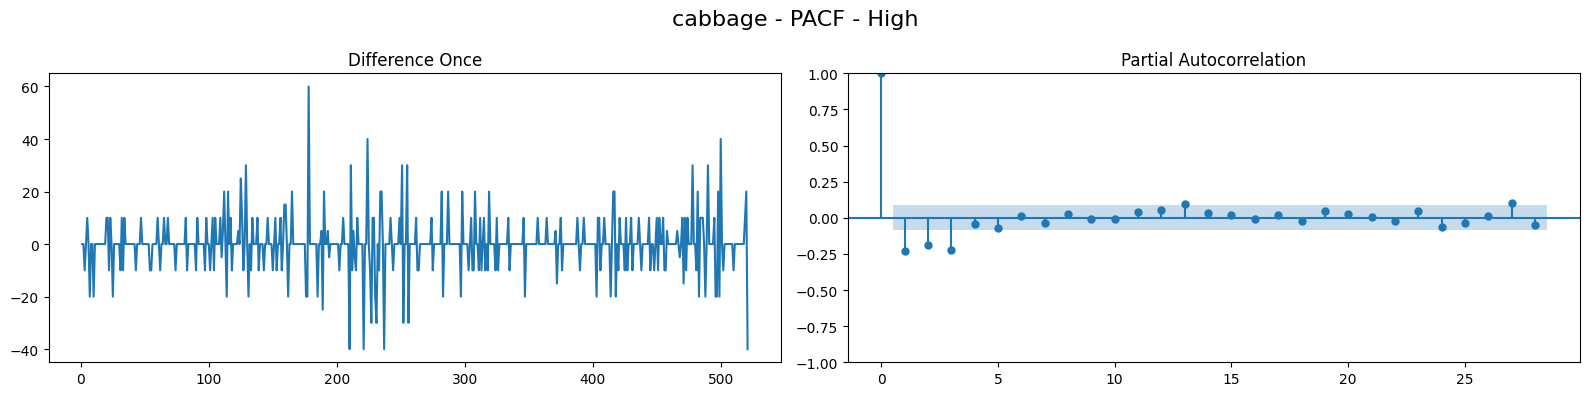

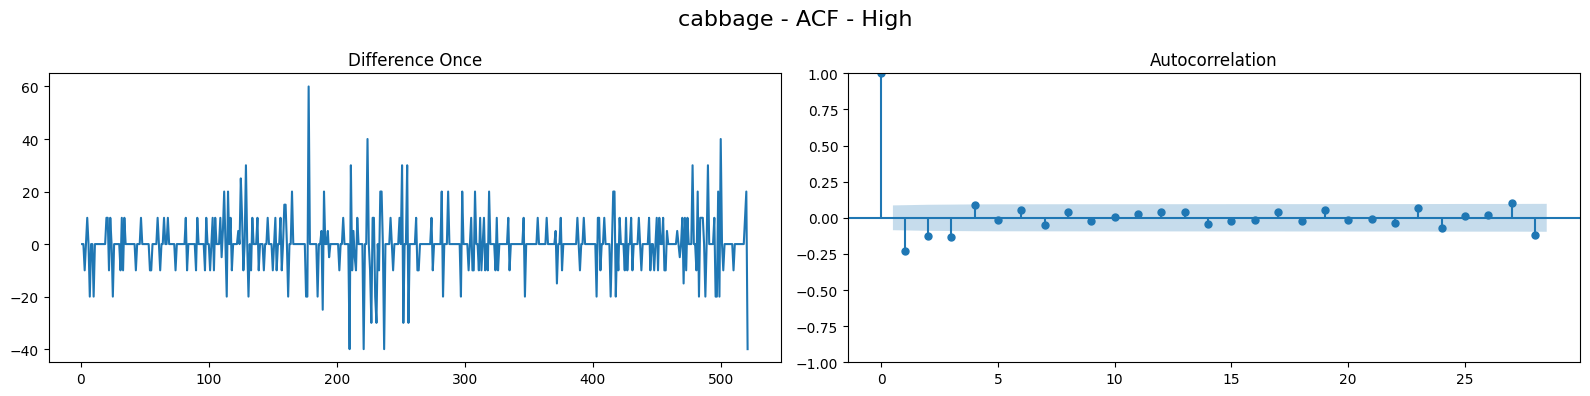

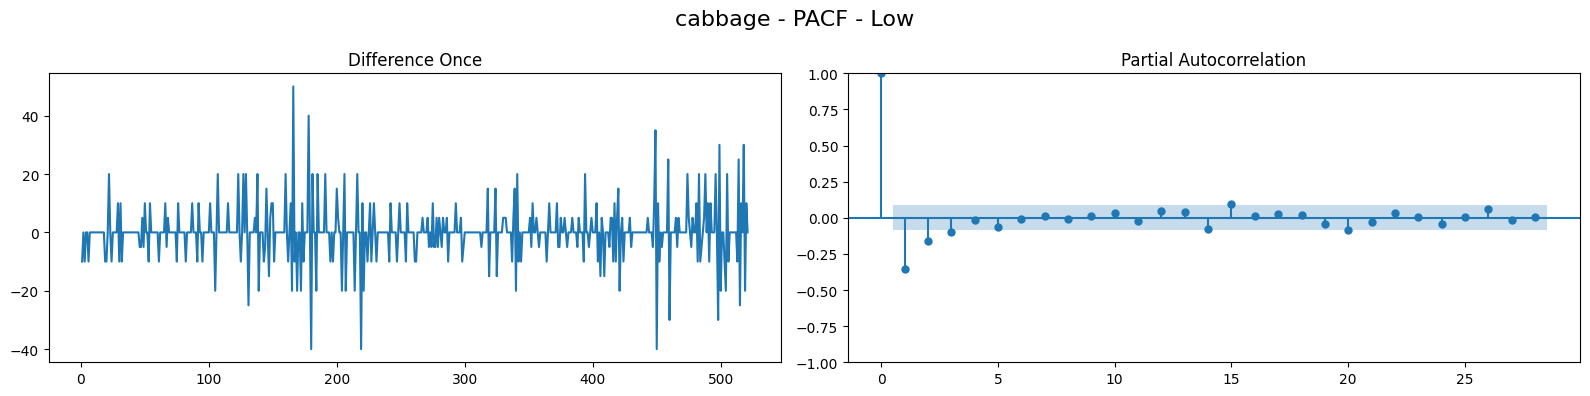

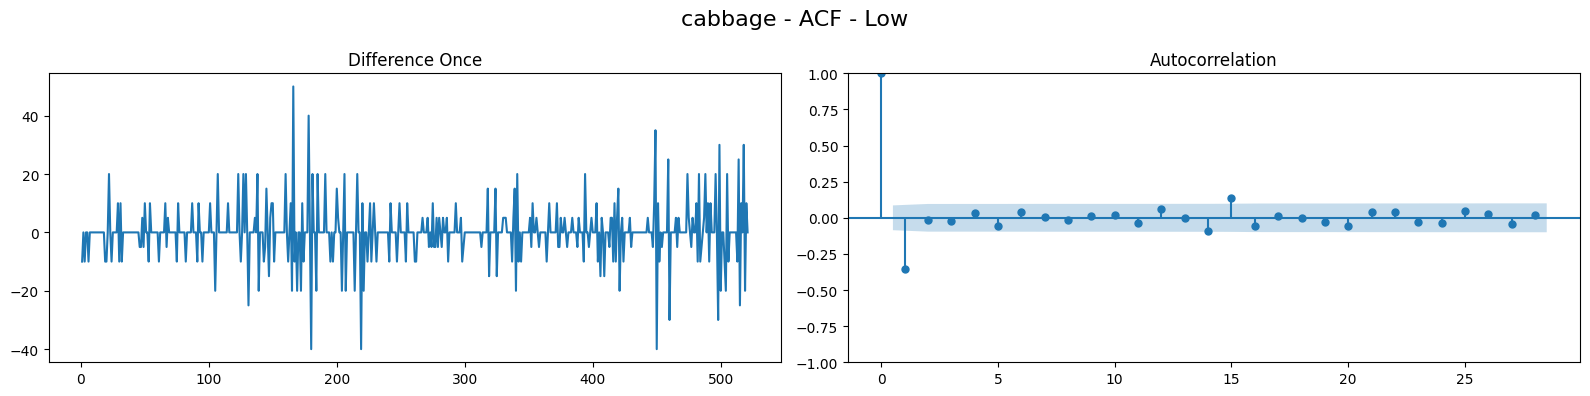

D-value for cabbage - High: 1
D-value for cabbage - Low: 1

Processing carrots...


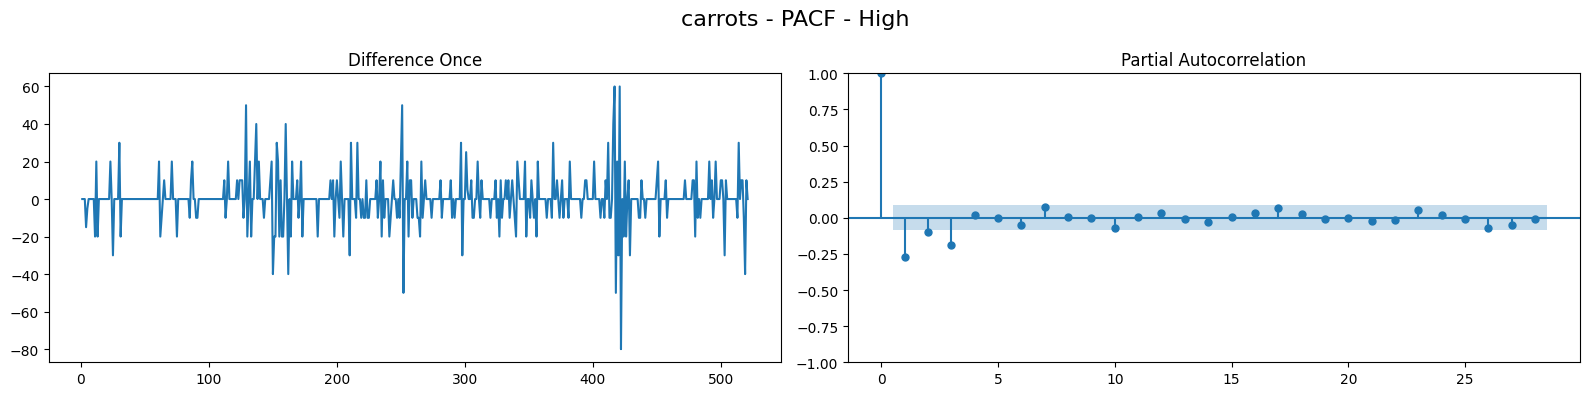

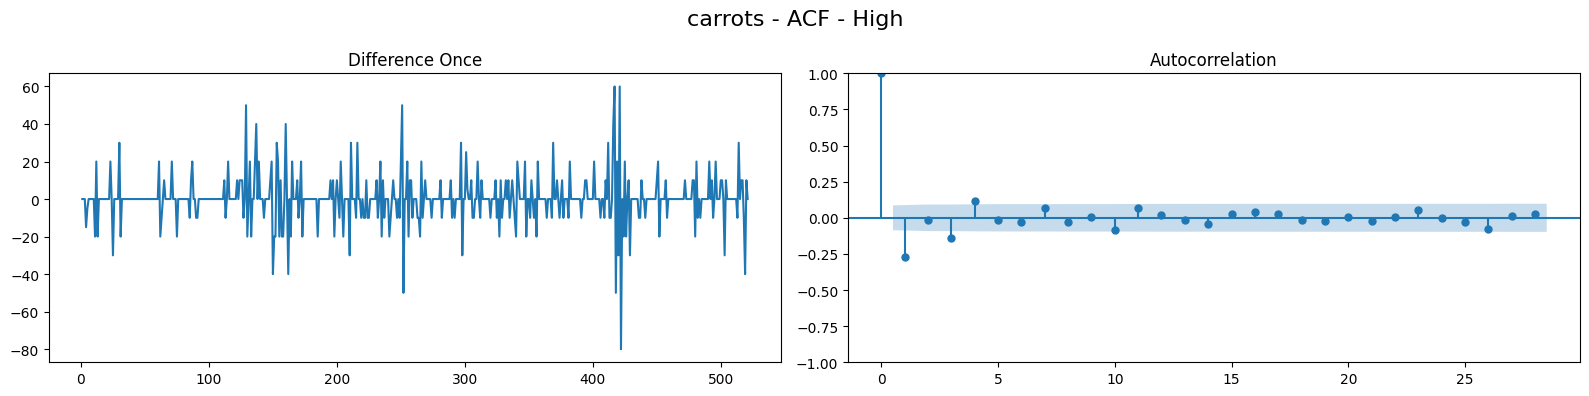

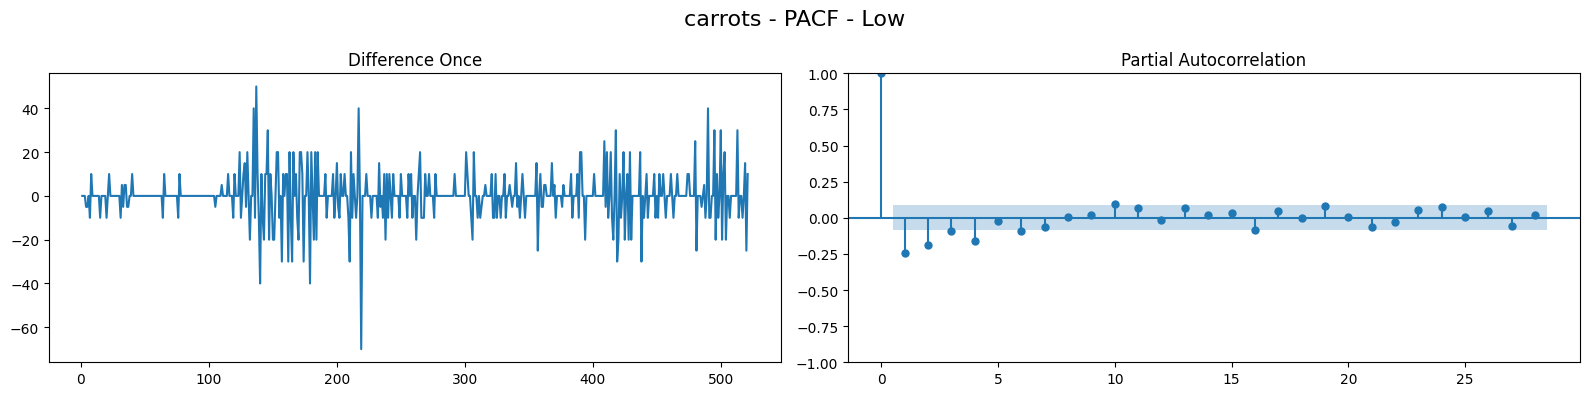

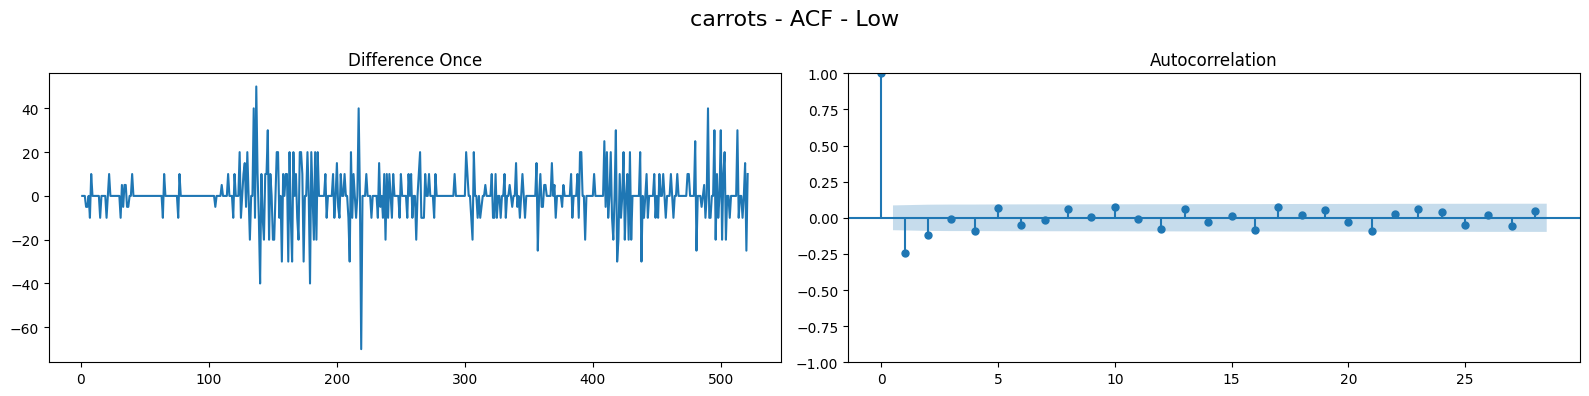

D-value for carrots - High: 1
D-value for carrots - Low: 1

Processing eggplant...


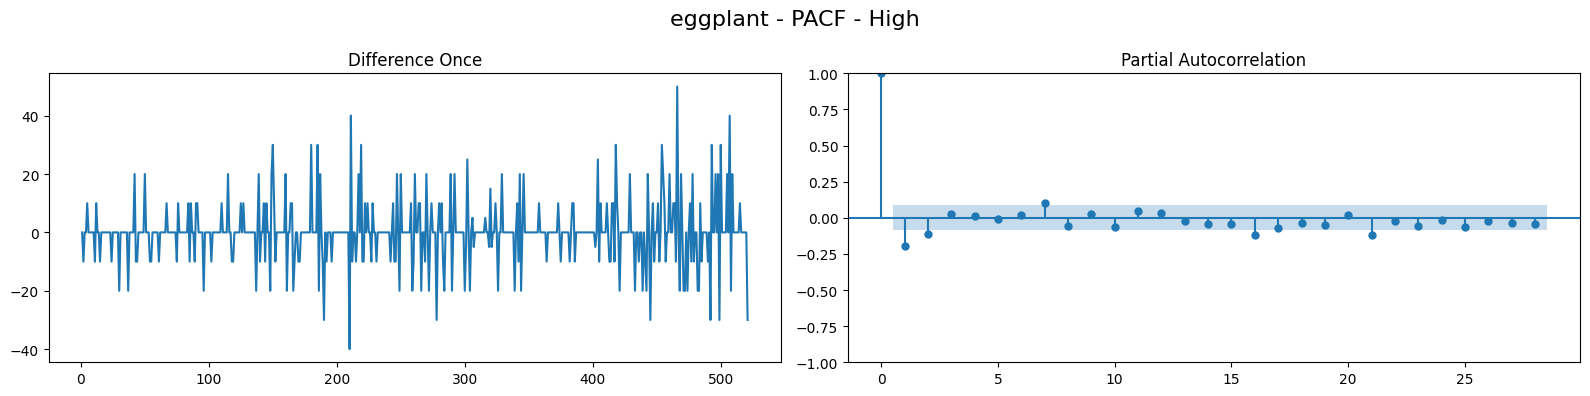

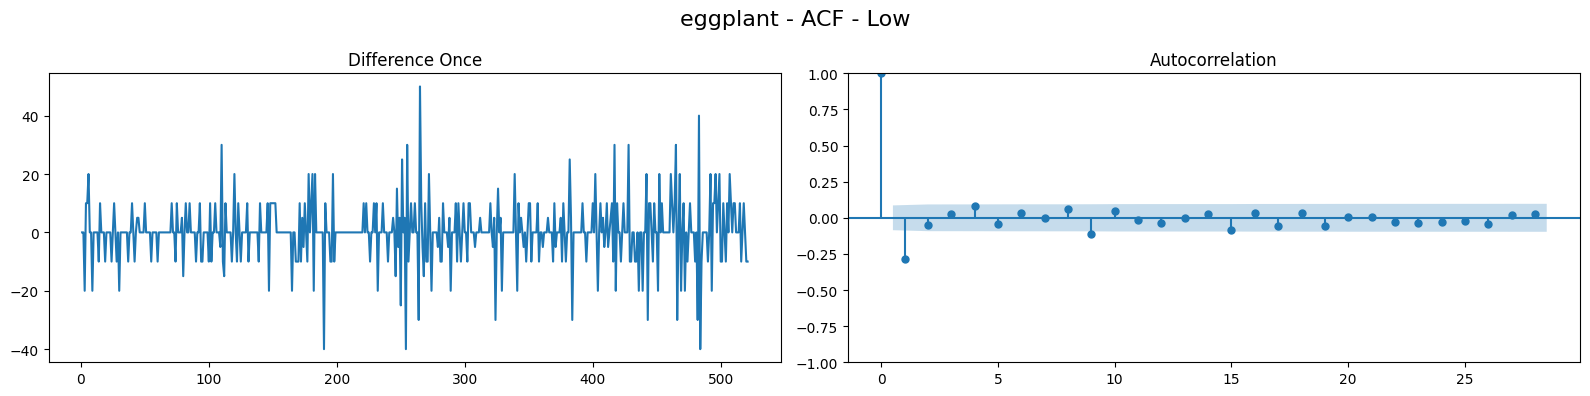

D-value for eggplant - High: 0
D-value for eggplant - Low: 0

Processing tomato...


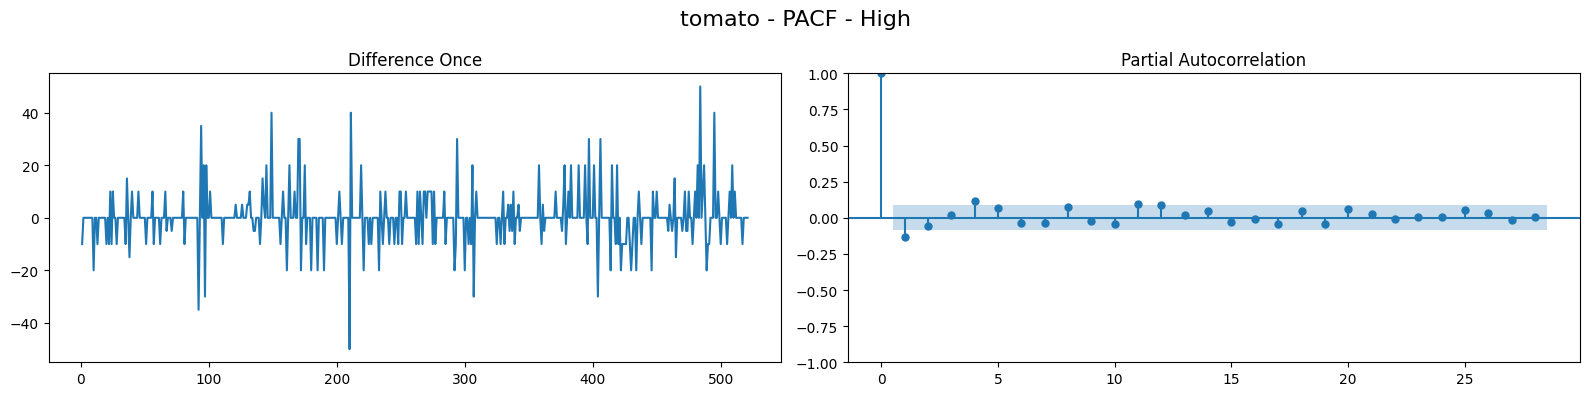

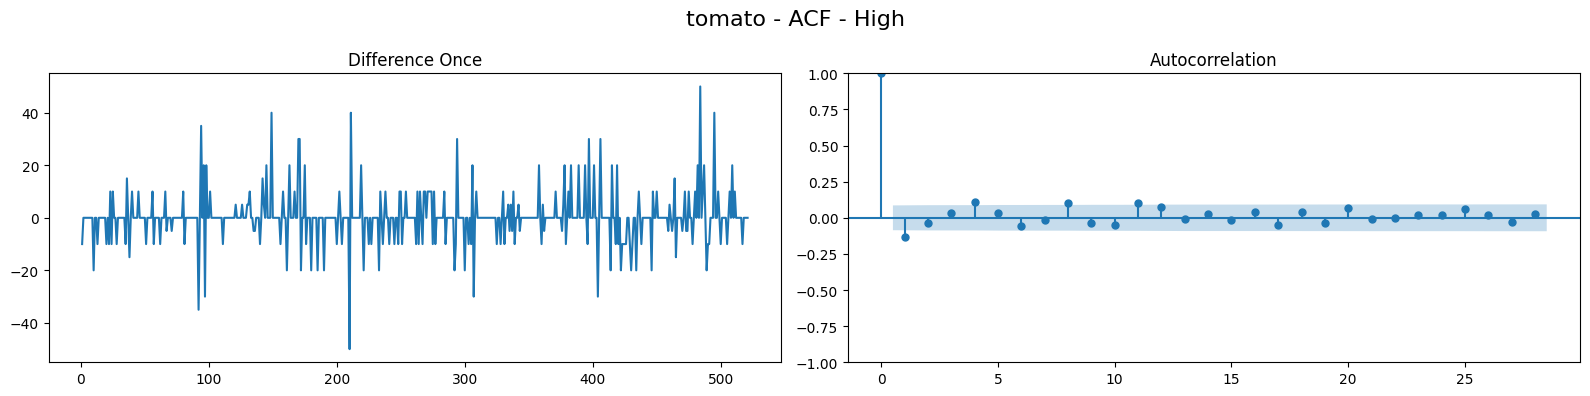

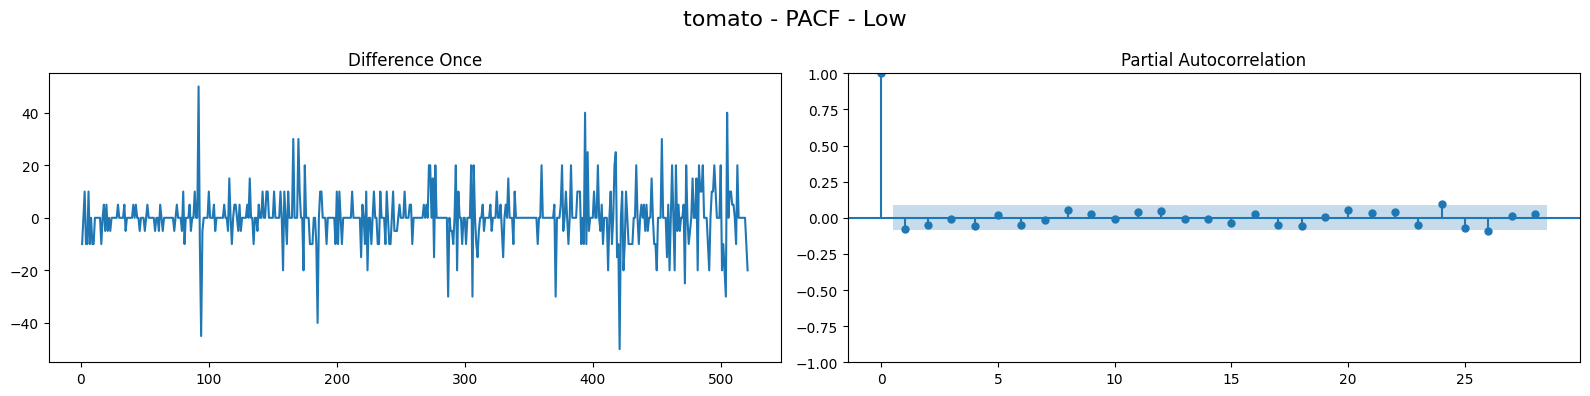

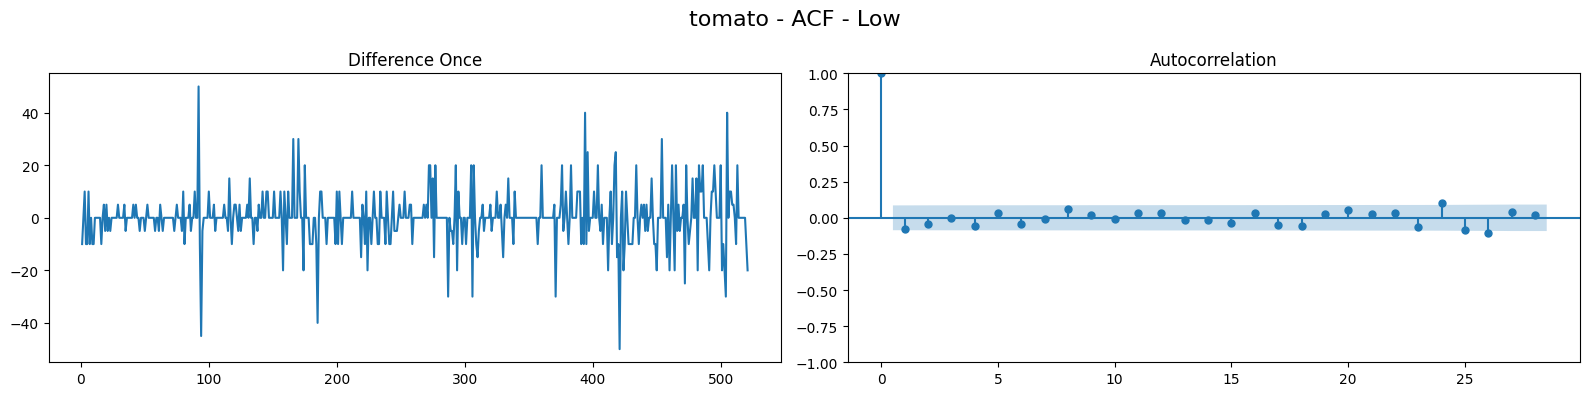

D-value for tomato - High: 1
D-value for tomato - Low: 1

Processing white_potato...


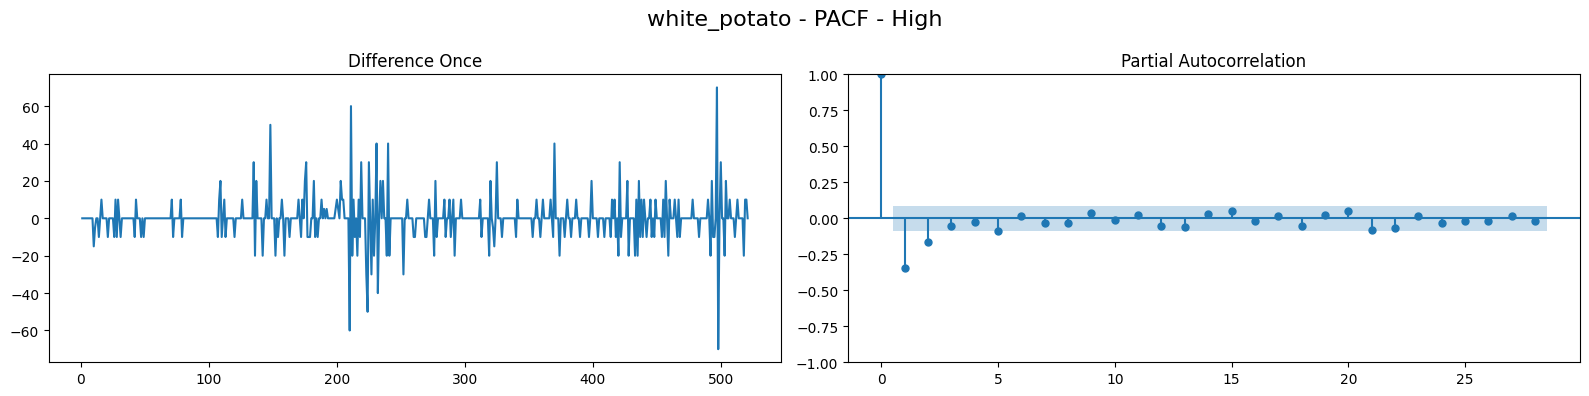

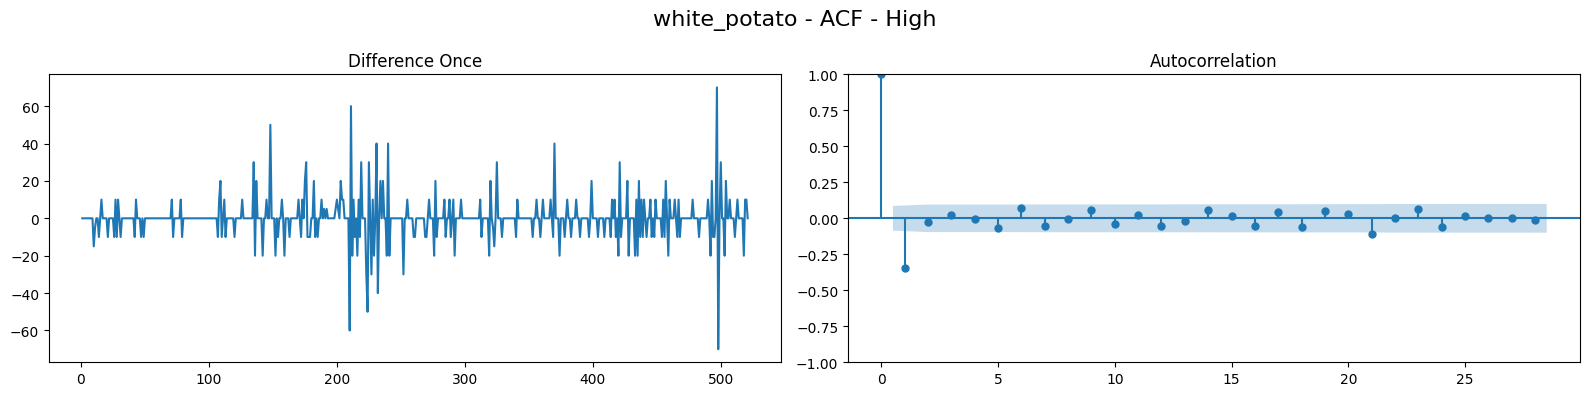

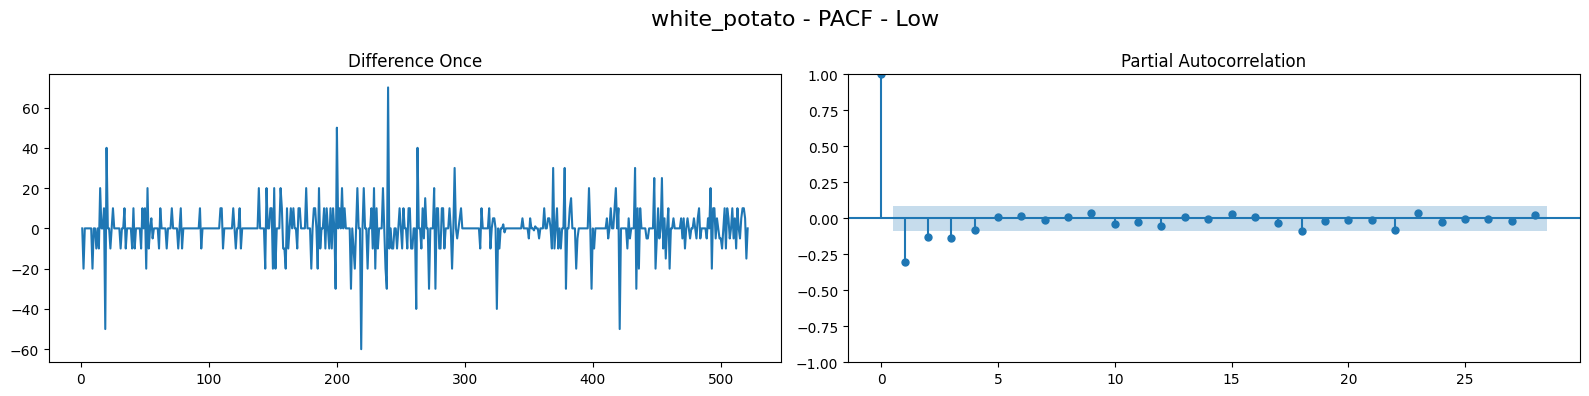

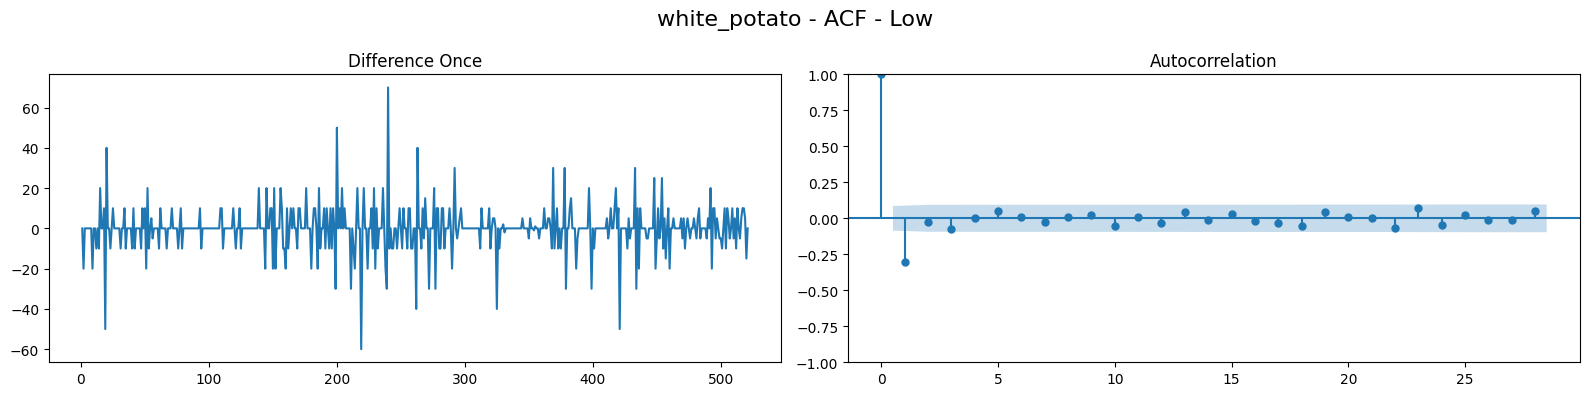

D-value for white_potato - High: 1
D-value for white_potato - Low: 1

Processing red_onion...


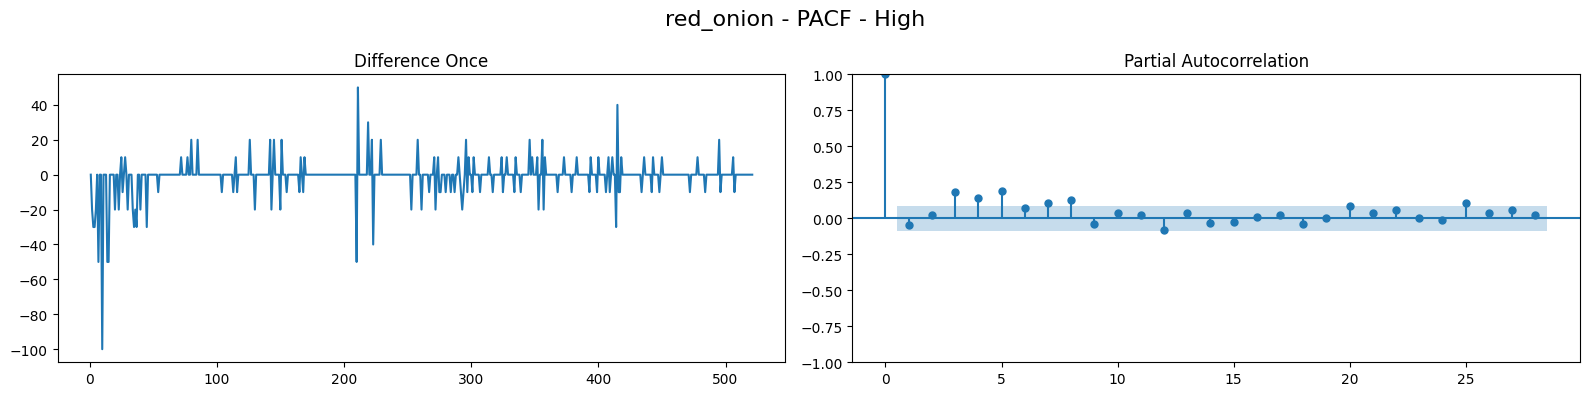

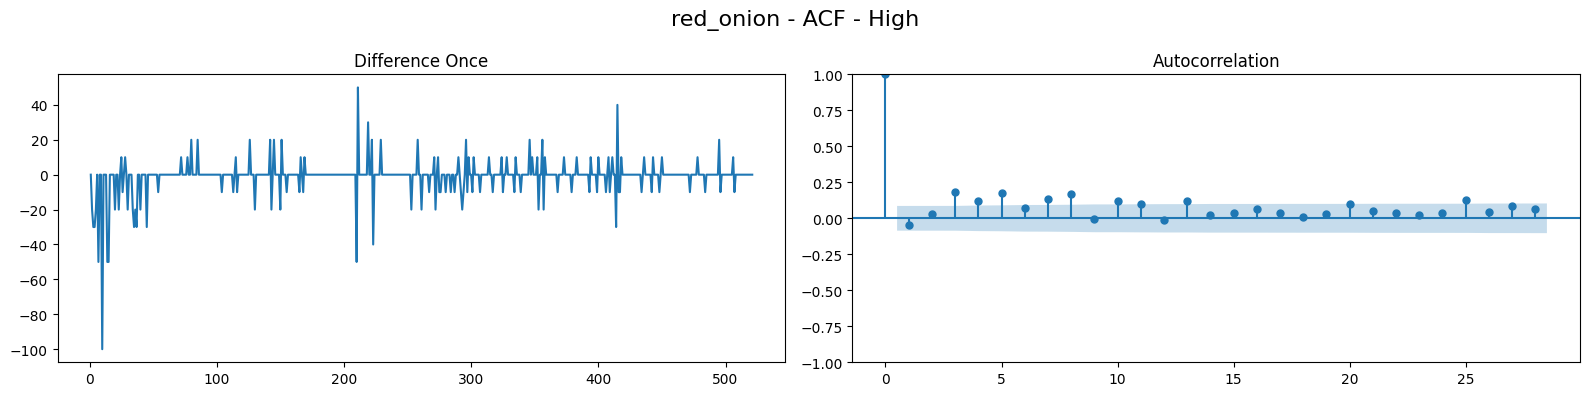

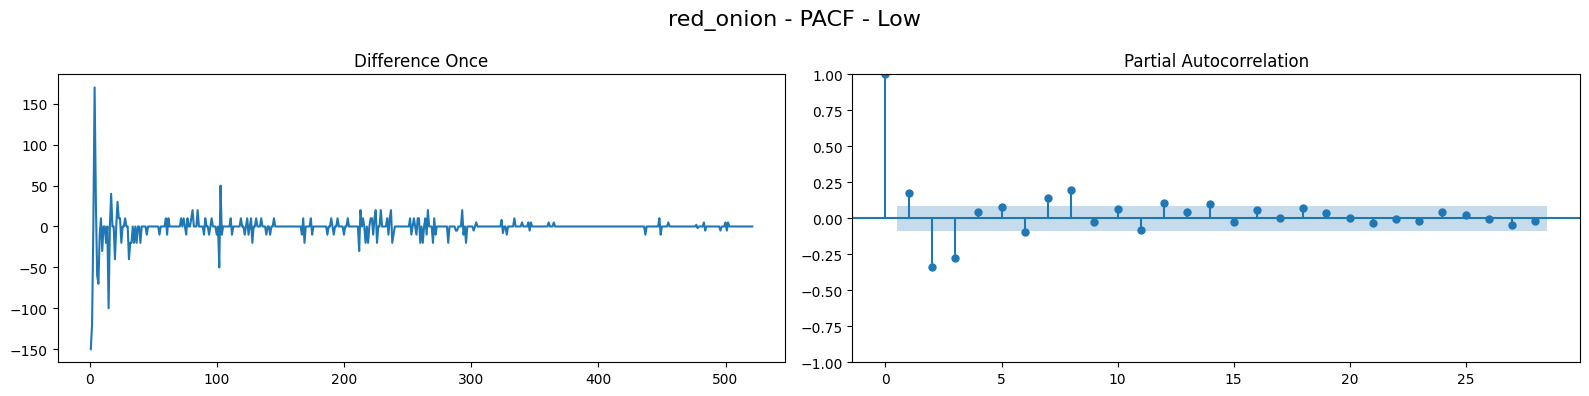

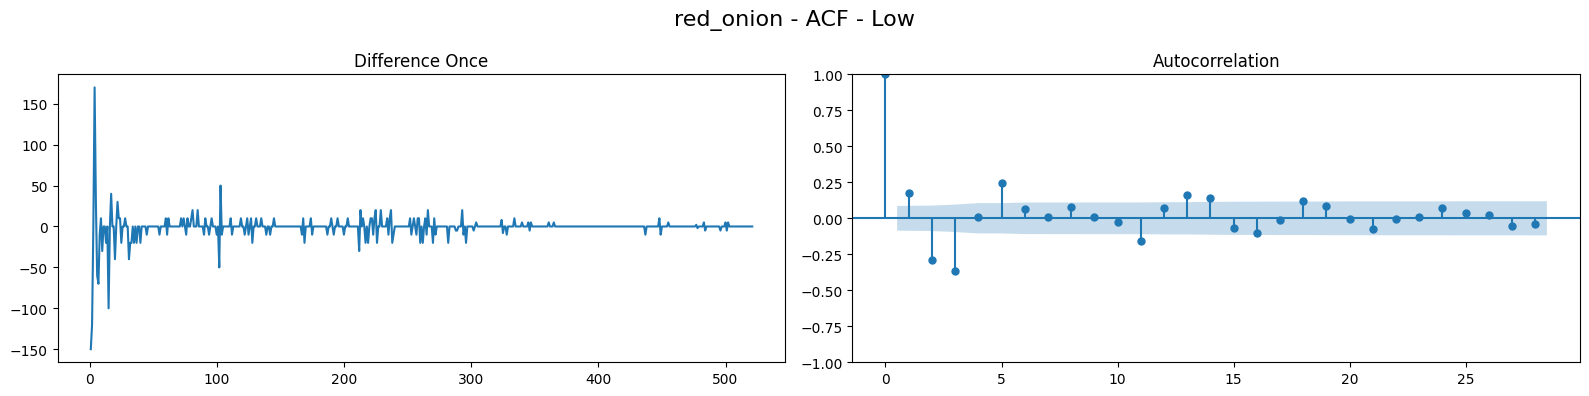

D-value for red_onion - High: 0
D-value for red_onion - Low: 0

Processing garlic...


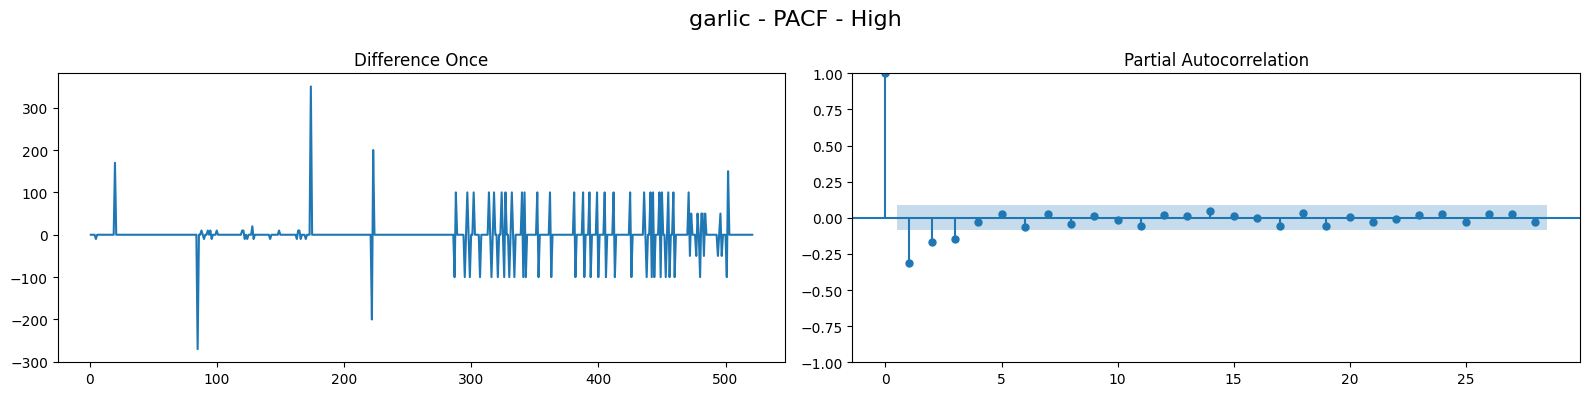

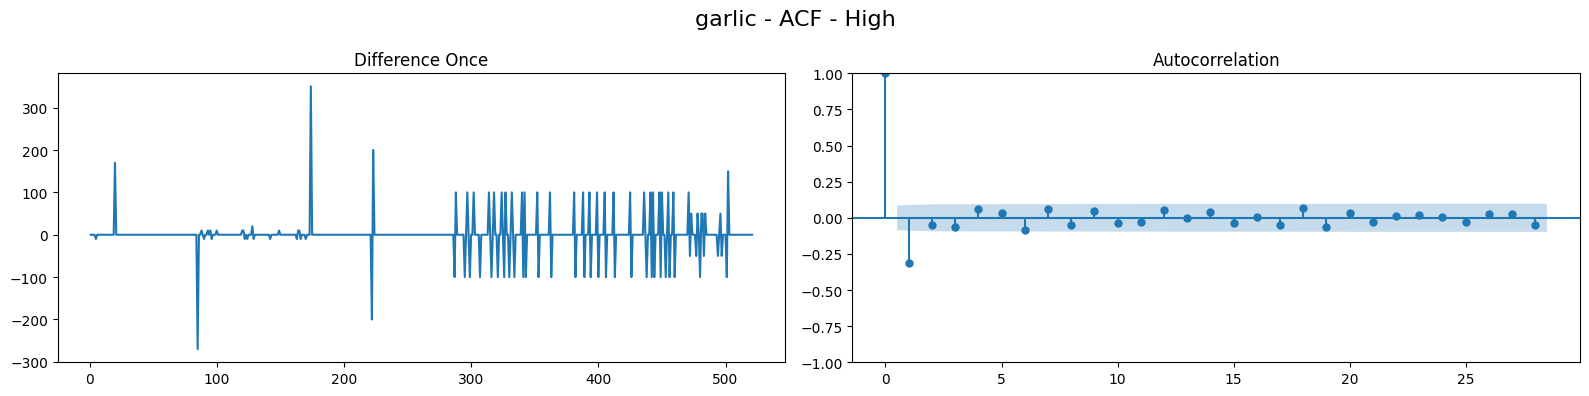

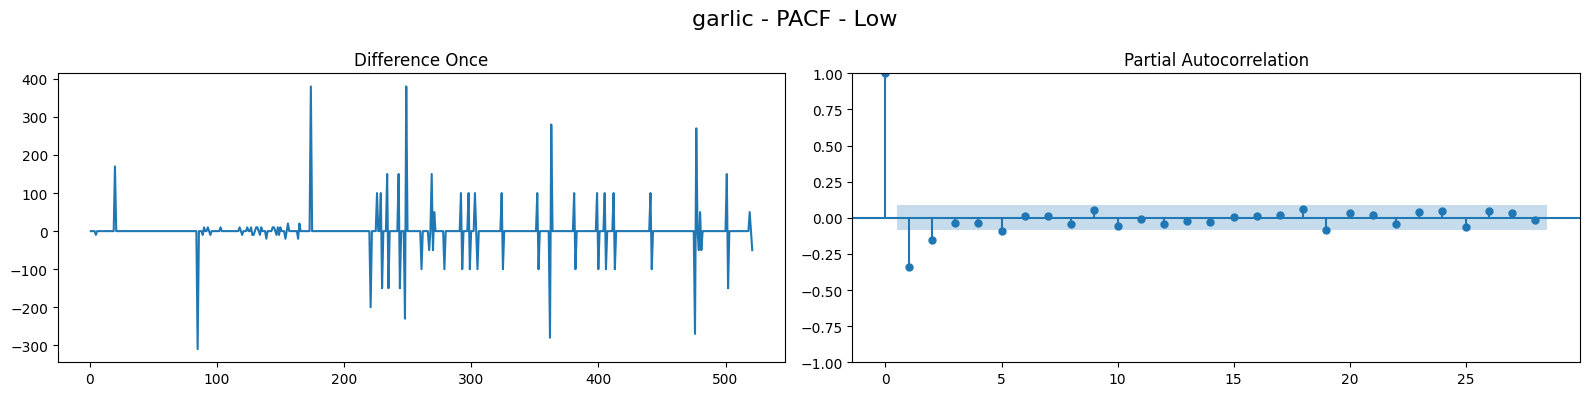

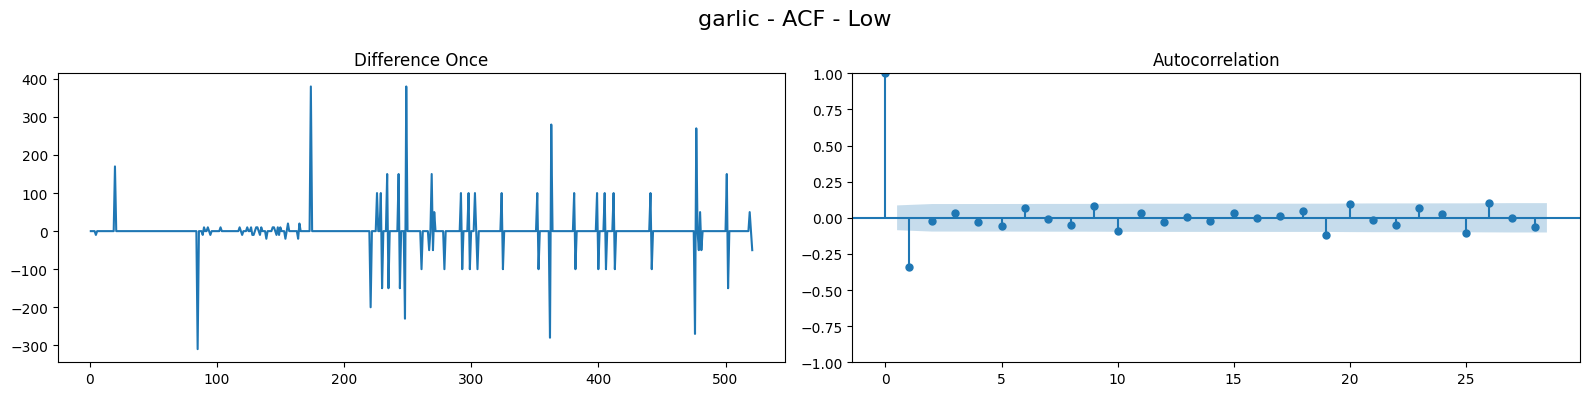

D-value for garlic - High: 1
D-value for garlic - Low: 1


In [14]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
import os

# Set pandas options
pd.set_option('display.max_rows', None)

# Helper function to plot ACF and PACF
def plot_acf_pacf(data, title, lag_type, save_path):
    """
    Plots ACF or PACF for the given data.

    Args:
        data (pd.Series): Differenced series to analyze.
        title (str): Title for the plot.
        lag_type (str): Type of lag plot ("ACF" or "PACF").
        save_path (str): Path to save the plot image.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    ax1.plot(data)
    ax1.set_title('Difference Once')
    ax2.set_title(f'{lag_type} Plot')

    if lag_type == "ACF":
        plot_acf(data, ax=ax2)
    elif lag_type == "PACF":
        plot_pacf(data, ax=ax2)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.savefig(save_path)  
    plt.show()
    plt.close()  # Close the plot to prevent it from being displayed on further iterations

# Main function for processing commodities
def process_commodity(specific_commodity, csv_path, high_params, low_params):
    """
    Processes a specific commodity by loading data, calculating ACF/PACF, and determining 'd' for both 'High' and 'Low' columns.

    Args:
        specific_commodity (str): Name of the commodity.
        csv_path (str): Path to the CSV file.
        high_params (tuple): ARIMA parameters for the 'High' column.
        low_params (tuple): ARIMA parameters for the 'Low' column.
    """
    try:
        # Load CSV data
        if not os.path.exists(csv_path):
            raise FileNotFoundError(f"CSV file not found at path: {csv_path}")

        df = pd.read_csv(csv_path)
        if 'High' not in df.columns or 'Low' not in df.columns:
            raise ValueError(f"'High' or 'Low' column not found in the CSV for {specific_commodity}.")

        # Differencing for stationarity for both 'High' and 'Low'
        diff_high = df['High'].diff().dropna()
        diff_low = df['Low'].diff().dropna()

        # Prepare the directory to save the plots
        save_dir = f"../graphs/acf_pacf"
        os.makedirs(save_dir, exist_ok=True)

        # Plot PACF and ACF for 'High' and 'Low' columns and save the images
        print(f"\nProcessing {specific_commodity}...")
        plot_acf_pacf(diff_high, f"{specific_commodity} - PACF - High", "PACF", os.path.join(save_dir, f"{specific_commodity}_high_pacf.png"))
        plot_acf_pacf(diff_high, f"{specific_commodity} - ACF - High", "ACF", os.path.join(save_dir, f"{specific_commodity}_high_acf.png"))
        plot_acf_pacf(diff_low, f"{specific_commodity} - PACF - Low", "PACF", os.path.join(save_dir, f"{specific_commodity}_low_pacf.png"))
        plot_acf_pacf(diff_low, f"{specific_commodity} - ACF - Low", "ACF", os.path.join(save_dir, f"{specific_commodity}_low_acf.png"))

        # Calculate d-value for both 'High' and 'Low' columns
        d_value_high = ndiffs(df['High'], test='adf')
        d_value_low = ndiffs(df['Low'], test='adf')
        print(f"D-value for {specific_commodity} - High: {d_value_high}")
        print(f"D-value for {specific_commodity} - Low: {d_value_low}")
    except Exception as e:
        print(f"Error processing {specific_commodity}: {e}")

# Commodity dictionary with ARIMA parameters for both 'High' and 'Low'
commodity = {
    "rice": {
        "regular_milled_rice": [(25, 1, 0), (22, 0, 19)],
        "well_milled_rice": [(24, 0, 4), (27, 0, 2)],
        "premium_rice": [(6, 1, 10), (7, 1, 27)],
        "special_rice": [(0, 0, 1), (15, 1, 13)]
    },
    "meat": {
        "beef_brisket": [(28, 0, 33), (30, 1, 0)],
        "beef_rump": [(4, 1, 25), (27, 1, 1)],
        "whole_chicken": [(39, 0, 46), (1, 0, 0)],
        "pork_belly": [(45, 0, 37), (35, 0, 0)],
        "pork_kasim": [(39, 0, 0), (33, 0, 29)]
    },
    "fish": {
        "alumahan": [(28, 0, 33), (42, 1, 28)],
        "bangus": [(33, 1, 38), (33, 1, 45)],
        "galunggong": [(28, 0, 0), (28, 1, 0)],
        "tilapia": [(43, 0, 39), (29, 1, 0)]
    },
    "fruits": {
        "banana_lakatan": [(7, 0, 10), (15, 1, 17)],
        "calamansi": [(29, 0, 36), (45, 0, 32)],
        "mango": [(47, 2, 0), (49, 0, 0)],
        "papaya": [(31, 1, 34), (42, 1, 0)]
    },
    "vegetables": {
        "cabbage": [(49, 0, 0), (49, 0, 49)],
        "carrots": [(31, 0, 30), (40, 0, 0)],
        "eggplant": [(31, 1, 39), (35, 0, 0)],
        "tomato": [(0, 0, 15), (40, 0, 0)],
        "white_potato": [(47, 1, 32), (28, 2, 32)]
    },
    "spices": {
        "red_onion": [(1, 1, 27), (5, 1, 11)],
        "garlic": [(29, 1, 30), (31, 2, 0)]
    }
}

# Iterate through commodity groups and process each specific commodity
base_path = "../csv"
for group, items in commodity.items():
    for specific, (high_params, low_params) in items.items():
        csv_file = os.path.join(base_path, group, f"{specific}.csv")
        process_commodity(specific, csv_file, high_params, low_params)